In [1]:
library(DESeq2)
library(ggplot2)
library(reshape2)
library(patchwork)
library(ggrepel)
library(cowplot)
library(grid)
library(RColorBrewer)
library(repr) 
library(glmpca)
library(pheatmap)
library(PoiClaClu)
library(apeglm)
library(ashr)
library(vsn)
library(dplyr)
library(tidyr)
library(viridis)  
library("pheatmap")
library("ReportingTools")
library("BiocParallel")
library(glmpca)
library(emdbook)  
library(tidyverse)
register(MulticoreParam(4))
library(sva)
library(RUVSeq)
library(GenomicRanges)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(org.Hs.eg.db)
library(data.table)
library(biomaRt)
library(ensembldb)
library(AnnotationHub)
library(data.table)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [2]:
# Load count data
count_data <- read.csv("A2780_peak_counts.txt", 
                       skip = 1, sep="\t", header=TRUE, stringsAsFactors=FALSE)  

head(count_data,2 )

# Remove the ".genomicAllAligned.sorted.bam" suffix from column names
colnames(count_data) <- sub("\\.CLAM.genomicAllAligned\\.sorted\\.bam$", "", colnames(count_data))
head(count_data, 2)
colnames(count_data)

colnames(count_data) <- sub("^([^\\.]+)\\..*", "\\1", colnames(count_data))
head(count_data, 2)
colnames(count_data, 2)

Geneid          Chr            Start             End               Strand
1 ENSG00000290825 chr1;chr1;chr1 14421;21321;21621 14521;21421;21721 +;+;+ 
2 ENSG00000310526 chr1;chr1;chr1 14656;16856;21956 14756;16956;22056 -;-;- 
  Length CS13_1.CS13_1.CLAM.genomicAllAligned.sorted.bam
1 303     15                                            
2 303    134                                            
  CS13_1in.CS13_1in.CLAM.genomicAllAligned.sorted.bam
1 19                                                 
2 99                                                 
  CS13_2.CS13_2.CLAM.genomicAllAligned.sorted.bam
1  10                                            
2 111                                            
  CS13_2in.CS13_2in.CLAM.genomicAllAligned.sorted.bam
1 11                                                 
2 86                                                 
  DC13_1.DC13_1.CLAM.genomicAllAligned.sorted.bam
1  18                                            
2 193                                            
  DC13_1in.DC13_1in.CLAM.genomicAllAligned.sorted.bam
1  27                                                
2 105                                                
  DC13_2.DC13_2.CLAM.genomicAllAligned.sorted.bam
1  27                                            
2 137                                            
  DC13_2in.DC13_2in.CLAM.genomicAllAligned.sorted.bam
1  33                                                
2 133                                                
  pla13_1.pla13_1.CLAM.genomicAllAligned.sorted.bam
1  21                                              
2 165                                              
  pla13_1in.pla13_1in.CLAM.genomicAllAligned.sorted.bam
1  25                                                  
2 144                                                  
  pla13_2.pla13_2.CLAM.genomicAllAligned.sorted.bam
1  78                                              
2 331                                              
  pla13_2in.pla13_2in.CLAM.genomicAllAligned.sorted.bam
1  45                                                  
2 252

Geneid          Chr            Start             End               Strand
1 ENSG00000290825 chr1;chr1;chr1 14421;21321;21621 14521;21421;21721 +;+;+ 
2 ENSG00000310526 chr1;chr1;chr1 14656;16856;21956 14756;16956;22056 -;-;- 
  Length CS13_1.CS13_1 CS13_1in.CS13_1in CS13_2.CS13_2 CS13_2in.CS13_2in
1 303     15           19                 10           11               
2 303    134           99                111           86               
  DC13_1.DC13_1 DC13_1in.DC13_1in DC13_2.DC13_2 DC13_2in.DC13_2in
1  18            27                27            33              
2 193           105               137           133              
  pla13_1.pla13_1 pla13_1in.pla13_1in pla13_2.pla13_2 pla13_2in.pla13_2in
1  21              25                  78              45                
2 165             144                 331             252

[1] "Geneid"              "Chr"                 "Start"              
 [4] "End"                 "Strand"              "Length"             
 [7] "CS13_1.CS13_1"       "CS13_1in.CS13_1in"   "CS13_2.CS13_2"      
[10] "CS13_2in.CS13_2in"   "DC13_1.DC13_1"       "DC13_1in.DC13_1in"  
[13] "DC13_2.DC13_2"       "DC13_2in.DC13_2in"   "pla13_1.pla13_1"    
[16] "pla13_1in.pla13_1in" "pla13_2.pla13_2"     "pla13_2in.pla13_2in"

Geneid          Chr            Start             End               Strand
1 ENSG00000290825 chr1;chr1;chr1 14421;21321;21621 14521;21421;21721 +;+;+ 
2 ENSG00000310526 chr1;chr1;chr1 14656;16856;21956 14756;16956;22056 -;-;- 
  Length CS13_1 CS13_1in CS13_2 CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in
1 303     15    19        10    11        18     27       27     33     
2 303    134    99       111    86       193    105      137    133     
  pla13_1 pla13_1in pla13_2 pla13_2in
1  21      25        78      45      
2 165     144       331     252

[1] "Geneid"    "Chr"       "Start"     "End"       "Strand"    "Length"   
 [7] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
[13] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

In [3]:
count_data2 <- count_data %>%
  mutate(
    Chr = sapply(strsplit(Chr, ";"), `[`, 1),
    Start = sapply(strsplit(Start, ";"), function(x) min(as.integer(x))),
    End = sapply(strsplit(End, ";"), function(x) max(as.integer(x)))
  )

colnames(count_data2)
head(count_data2, 2)  

[1] "Geneid"    "Chr"       "Start"     "End"       "Strand"    "Length"   
 [7] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
[13] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

Geneid          Chr  Start End   Strand Length CS13_1 CS13_1in CS13_2
1 ENSG00000290825 chr1 14421 21721 +;+;+  303     15    19        10   
2 ENSG00000310526 chr1 14656 22056 -;-;-  303    134    99       111   
  CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in pla13_1 pla13_1in pla13_2 pla13_2in
1 11        18     27       27     33       21      25        78      45      
2 86       193    105      137    133      165     144       331     252

In [4]:
colnames(count_data2)
head(count_data2, 8)  

[1] "Geneid"    "Chr"       "Start"     "End"       "Strand"    "Length"   
 [7] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
[13] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

Geneid          Chr  Start  End   
1 ENSG00000290825 chr1  14421  21721
2 ENSG00000310526 chr1  14656  22056
3 ENSG00000241860 chr1 139395 139495
4 ENSG00000310528 chr1 187386 187686
5 ENSG00000310527 chr1 187446 187546
6 ENSG00000279457 chr1 187417 190017
7 ENSG00000293331 chr1 629954 633054
8 ENSG00000225880 chr1 629945 822845
  Strand                                            Length CS13_1 CS13_1in
1 +;+;+                                              303    15    19      
2 -;-;-                                              303   134    99      
3 -                                                  101    16     6      
4 -;-;-                                              301     1     5      
5 -                                                  101     0     0      
6 -;-                                                202     6     9      
7 -;-;-;-;-;-;-;-                                    806    18    18      
8 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;- 2517   142    49      
  CS13_2 CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in pla13_1 pla13_1in pla13_2
1  10    11        18     27       27     33       21      25        78    
2 111    86       193    105      137    133      165     144       331    
3  10    13        12      5       28     15       13       9       102    
4   0     0         1      4        1      2        0       2         7    
5   0     0         0      0        0      0        0       0         0    
6   5     3        13     13       14     18       16       3        20    
7  34    19        23     13       41     16       54      34        95    
8 126    76        89     44      210     61      151      89       451    
  pla13_2in
1  45      
2 252      
3  18      
4   2      
5   0      
6  17      
7  51      
8 150

[1] "number of peaks:"


[1] 8855

[1] 6917

>> preparing features information...		 2025-04-21 08:59:24 AM 
>> identifying nearest features...		 2025-04-21 08:59:25 AM 
>> calculating distance from peak to TSS...	 2025-04-21 08:59:26 AM 
>> assigning genomic annotation...		 2025-04-21 08:59:26 AM 
>> adding gene annotation...			 2025-04-21 08:59:43 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-04-21 08:59:43 AM 
>> done...					 2025-04-21 08:59:43 AM 
[1] "the annotation of the peaks:"


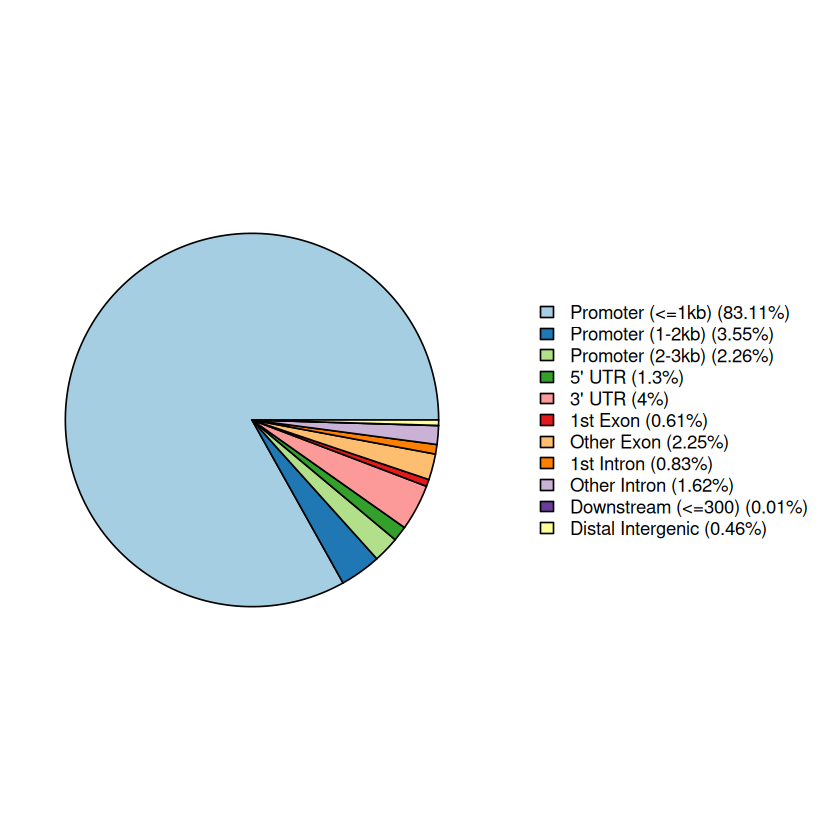

In [5]:
print("number of peaks:")
dim(count_data2)[1]

# Convert to GRanges object
gr <- GRanges(
  seqnames = count_data2$Chr,
  ranges = IRanges(start = count_data2$Start, end = count_data2$End)
)

# Merge overlCS13ping intervals
gr_merge <- GenomicRanges::reduce(gr)

# Convert bDC13k to data frame
df_merge <- as.data.frame(gr_merge)[, c("seqnames", "start", "end")]
colnames(df_merge) <- c("Chr", "Start", "End")

# Print or return merged peaks
dim(df_merge)[1]

# Annotate merged peaks to genome features
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

peak_anno <- annotatePeak(gr_merge, 
                          TxDb = txdb, 
                          tssRegion = c(-3000, 3000), 
                          annoDb = "org.Hs.eg.db")

# 📊 Plot annotation breakdown 
print("the annotation of the peaks:")
plotAnnoPie(peak_anno)

In [6]:
sample_cols = colnames(count_data2)[7:ncol(count_data2)]
head(sample_cols)
ncol(count_data2)

[1] "CS13_1"   "CS13_1in" "CS13_2"   "CS13_2in" "DC13_1"   "DC13_1in"

[1] 18

In [7]:
# Identify sample columns only
sample_cols <- colnames(count_data2)[7:ncol(count_data2)]  # assuming first 3 are metadata

# Now separate based on names ending in "in"
in_cols    <- grep("in$", sample_cols, value = TRUE)
no_in_cols <- grep("in$", sample_cols, value = TRUE, invert = TRUE)

sample_cols
in_cols
no_in_cols

head(count_data2, 2)

[1] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
 [7] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

[1] "CS13_1in"  "CS13_2in"  "DC13_1in"  "DC13_2in"  "pla13_1in" "pla13_2in"

[1] "CS13_1"  "CS13_2"  "DC13_1"  "DC13_2"  "pla13_1" "pla13_2"

Geneid          Chr  Start End   Strand Length CS13_1 CS13_1in CS13_2
1 ENSG00000290825 chr1 14421 21721 +;+;+  303     15    19        10   
2 ENSG00000310526 chr1 14656 22056 -;-;-  303    134    99       111   
  CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in pla13_1 pla13_1in pla13_2 pla13_2in
1 11        18     27       27     33       21      25        78      45      
2 86       193    105      137    133      165     144       331     252

In [8]:
print("separate the large dataframe into two sub dataframes, that contain IP samples and non-IP(input) samples")

[1] "separate the large dataframe into two sub dataframes, that contain IP samples and non-IP(input) samples"


In [9]:
# Create data frames with Geneid + in/out columns

# ip <- count_data2 %>% 
#  select(Geneid, all_of(no_in_cols))

# np <- count_data2 %>% 
#  select(Geneid, all_of(in_cols))

# head(ip, 2)
# head(np, 2)

# Create data frames with Geneid + in/out columns
ip <- count_data2[, c("Geneid", no_in_cols)]
np  <- count_data2[, c("Geneid", in_cols)]

# Quick check
head(ip, 2)
head(np, 2)

Geneid          CS13_1 CS13_2 DC13_1 DC13_2 pla13_1 pla13_2
1 ENSG00000290825  15     10     18     27     21      78    
2 ENSG00000310526 134    111    193    137    165     331

Geneid          CS13_1in CS13_2in DC13_1in DC13_2in pla13_1in pla13_2in
1 ENSG00000290825 19       11        27       33       25        45      
2 ENSG00000310526 99       86       105      133      144       252

In [10]:
# Select _IP columns + Geneid
# ip <- count_data2 %>% dplyr::select(Geneid, ends_with("_IP"))
# head(ip, 2)

# Select _NP columns + Geneid
# np <- count_data2 %>% dplyr::select(Geneid, ends_with("_NP"))
# head(np, 2)

In [11]:
print("!!!")

[1] "!!!"


In [12]:
print("Analysis performed on non.ip aka RNA samples")
print("To keep the code consistent, ip = np")

[1] "Analysis performed on non.ip aka RNA samples"
[1] "To keep the code consistent, ip = np"


In [13]:
print("!!!")

[1] "!!!"


In [14]:
ip = np
head(ip, 3)
tail(ip, 3)

Geneid          CS13_1in CS13_2in DC13_1in DC13_2in pla13_1in pla13_2in
1 ENSG00000290825 19       11        27       33       25        45      
2 ENSG00000310526 99       86       105      133      144       252      
3 ENSG00000241860  6       13         5       15        9        18

Geneid          CS13_1in CS13_2in DC13_1in DC13_2in pla13_1in pla13_2in
8853 ENSG00000198786 51108    49742    66716    86484    54830     88347    
8854 ENSG00000198695  7132     7333    12110    18500     8773     14715    
8855 ENSG00000198727 16319    17890    32044    32727    23074     32850

In [15]:
print("DESeq2 to measure the differential binding across IP samples :")

[1] "DESeq2 to measure the differential binding across IP samples :"


In [16]:
# Step 1: Select only columns ending with "_IP" and include Geneid for rownames
# ip <- count_data2 %>%
#      dplyr::select(Geneid, ends_with("_IP"))

# Step 2: Set Geneid as rownames and remove Geneid column
rownames(ip) <- ip$Geneid
ip <- ip[, -1]

# Step 3: Verify column names
sample_names <- colnames(ip)
print(sample_names)

# Step 4: Assign condition groups (DC13, CS13, pla13)
conditions <- ifelse(grepl("^CS13", sample_names), "CS13",
              ifelse(grepl("^DC13", sample_names), "DC13",
              ifelse(grepl("^pla13", sample_names), "pla13", NA)))
print(conditions)

# Step 5: Error handling if any unrecognized sample names
if (any(is.na(conditions))) {
  stop("Some sample names do not match expected patterns (CS13, DC13, pla13). Check column names!")
}

# Step 6: Create colData
col_data <- data.frame(
  row.names = sample_names,
  condition = factor(conditions, levels = c("CS13", "DC13", "pla13"))
)
print("col data:")
print(col_data)

# Step 7: Remove rows with NA values
dim(ip)
ip <- ip[complete.cases(ip), ]
dim(ip)

# Step 8: Compute summary statistics directly on ip (only numeric columns)
summary_stats <- data.frame(
  Median = apply(ip, 2, median, na.rm = TRUE),
  Min    = apply(ip, 2, min, na.rm = TRUE),
  Max    = apply(ip, 2, max, na.rm = TRUE)
)

# Step 9: Print the result
print(summary_stats)


[1] "CS13_1in"  "CS13_2in"  "DC13_1in"  "DC13_2in"  "pla13_1in" "pla13_2in"
[1] "CS13"  "CS13"  "DC13"  "DC13"  "pla13" "pla13"
[1] "col data:"
          condition
CS13_1in       CS13
CS13_2in       CS13
DC13_1in       DC13
DC13_2in       DC13
pla13_1in     pla13
pla13_2in     pla13


[1] 8855    6

[1] 8855    6

          Median Min     Max
CS13_1in      79   0  712967
CS13_2in      63   0  709056
DC13_1in      78   0 1501955
DC13_2in      91   0  653363
pla13_1in     92   0  929189
pla13_2in    126   0  661771


In [17]:
# Create DESeq2 dataset
dds <- DESeqDataSetFromMatrix(countData = ip, colData = col_data, design = ~condition)

# Set reference level for condition (pla13 will be the baseline)
dds$condition <- relevel(dds$condition, ref = "pla13")

# Print number of genes before filtering
cat("Number of genes before filtering:", nrow(dds), "\n")

# Estimate size fDC13tors (required for normalization)
dds <- estimateSizeFactors(dds)

# Filter: keep genes with normalized count >= 4 in at least 4 samples
keep <- rowSums(counts(dds, normalized = TRUE) >= 4) >= 4
dds <- dds[keep, ]

# Print number of genes after filtering
cat("Number of genes after filtering:", nrow(dds), "\n")

# Run DESeq2 differential expression analysis
dds <- DESeq(dds)

# ExtrDC13t results table
# res <- results(dds) 
# it will produce : Wald test p-value: condition DC13 vs pla13 

# View summary of results
# cat("First row of DE results:\n")
# print(head(res, 1))
# cat("Last row of DE results:\n")
# print(tail(res, 1))
# cat("Summary of DESeq2 results:\n")
# print(summary(res))

# Show contrast names
cat("available result contrasts:\n")
print(resultsNames(dds))

# Size fDC13tors (re-estimation here is harmless but redundant)
cat("The size factors are:\n")
print(sizeFactors(dds))

# ExtrDC13t normalized counts
norm_counts <- counts(dds, normalized = TRUE)

# Preview normalized counts
cat("Preview of normalized counts:\n")
print(head(norm_counts, 2))

# Spla13e normalized counts to.csv
write.csv(norm_counts, "A2780.peaks.IP.samples.normalized.counts.csv", row.names = TRUE)

# Compute summary statistics for eDC13h sample (column)
summary_stats2 <- data.frame(
  Median = apply(norm_counts, 2, median, na.rm = TRUE),
  Min    = apply(norm_counts, 2, min, na.rm = TRUE),
  Max    = apply(norm_counts, 2, max, na.rm = TRUE)
)

# Print summary statistics
cat("Summary of the normalized counts:\n")
print(round(summary_stats2, 2))

# Show pla13ailable assays in the DESeqDataSet
cat("Available assays in dds:\n")
print(names(assays(dds)))

# View fitted means (mu) and Cook's distances
cat("DESeq2 fitted means (mu):\n")
print(head(assay(dds, "mu"), 2))

cat("DESeq2 Cook's distances (cooks):\n")
print(head(assay(dds, "cooks"), 2))

Number of genes before filtering: 8855 
Number of genes after filtering: 7702 


using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



available result contrasts:
[1] "Intercept"               "condition_CS13_vs_pla13"
[3] "condition_DC13_vs_pla13"
The size factors are:
 CS13_1in  CS13_2in  DC13_1in  DC13_2in pla13_1in pla13_2in 
0.9021212 0.7382675 0.9300759 1.0682061 1.0773697 1.5145888 
Preview of normalized counts:
                 CS13_1in  CS13_2in  DC13_1in  DC13_2in pla13_1in pla13_2in
ENSG00000290825  21.06147  14.89975  29.02989  30.89292  23.20466  29.71103
ENSG00000310526 109.74135 116.48894 112.89401 124.50781 133.65886 166.38180
Summary of the normalized counts:
          Median Min       Max
CS13_1in  116.39   0  790322.9
CS13_2in  113.78   0  960432.3
DC13_1in  109.67   0 1614873.6
DC13_2in  111.40   0  611645.1
pla13_1in 112.31   0  862460.7
pla13_2in 110.26   0  436931.1
Available assays in dds:
[1] "counts" "mu"     "H"      "cooks" 
DESeq2 fitted means (mu):
                 CS13_1in CS13_2in  DC13_1in  DC13_2in pla13_1in pla13_2in
ENSG00000290825  16.34707 13.37793  27.88387  32.02504  28.66362  4

In [18]:
# Extract raw (unnormalized) counts
print("raw counts")
raw_counts <- counts(dds, normalized = FALSE)
head(raw_counts, 2)

# Extract normalized counts
print("norm counts")
norm_counts <- counts(dds, normalized = TRUE)
head(norm_counts, 2)

[1] "raw counts"


CS13_1in CS13_2in DC13_1in DC13_2in pla13_1in pla13_2in
ENSG00000290825 19       11        27       33       25        45      
ENSG00000310526 99       86       105      133      144       252

[1] "norm counts"


CS13_1in  CS13_2in  DC13_1in  DC13_2in  pla13_1in pla13_2in
ENSG00000290825  21.06147  14.89975  29.02989  30.89292  23.20466  29.71103
ENSG00000310526 109.74135 116.48894 112.89401 124.50781 133.65886 166.38180

[1] "Boxplot of Raw vs log2 Normalized Counts"


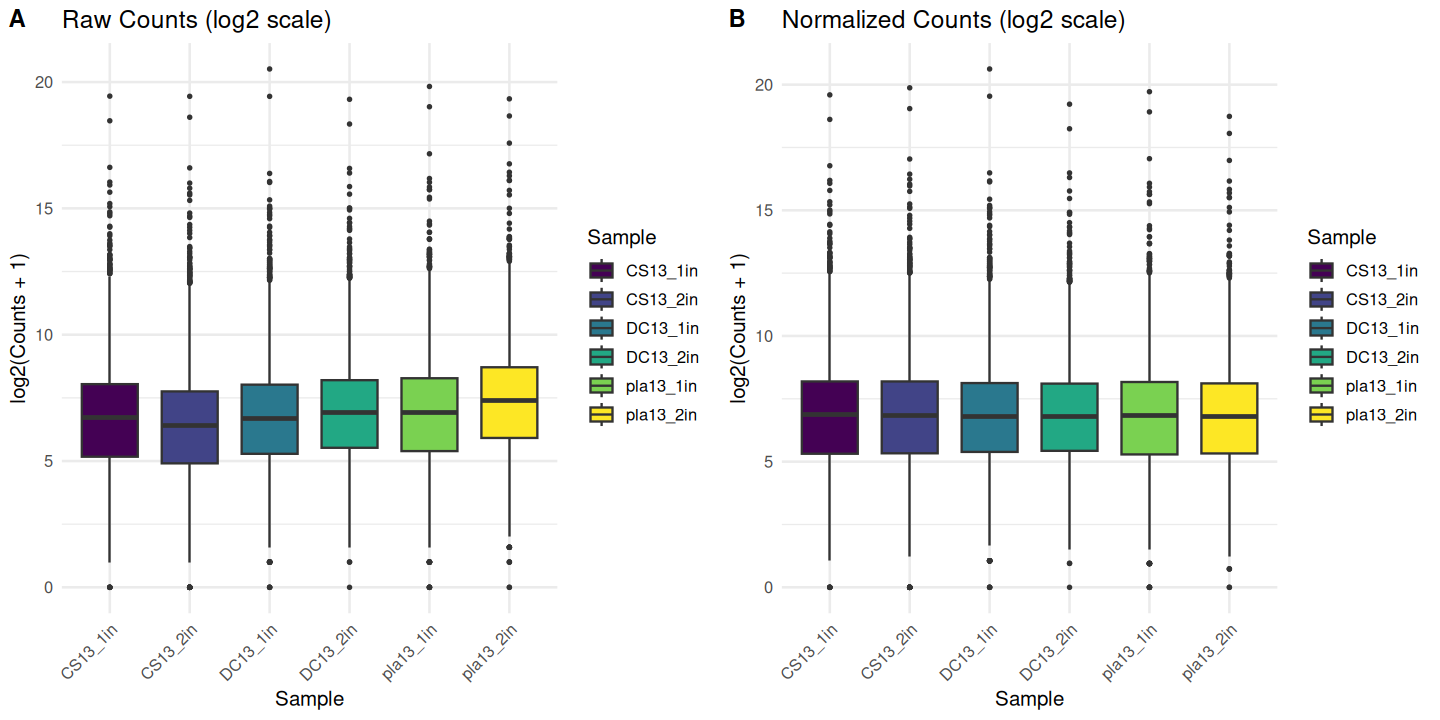

In [19]:
print("Boxplot of Raw vs log2 Normalized Counts")

# Prepare raw counts
raw_counts <- as.data.frame(counts(dds, normalized = FALSE))
raw_counts$Gene <- rownames(raw_counts)
raw_long <- pivot_longer(raw_counts, -Gene, names_to = "Sample", values_to = "Count")
raw_long$log2_count <- log2(raw_long$Count + 1)

# Prepare normalized counts
norm_counts <- as.data.frame(counts(dds, normalized = TRUE))
norm_counts$Gene <- rownames(norm_counts)
norm_long <- pivot_longer(norm_counts, -Gene, names_to = "Sample", values_to = "Count")
norm_long$log2_count <- log2(norm_long$Count + 1)

# Color palette
sample_list <- unique(c(raw_long$Sample, norm_long$Sample))
sample_colors <- setNames(viridis::viridis(length(sample_list), option = "D"), sample_list)

# Plot p1: Raw counts
p1 <- ggplot(raw_long, aes(x = Sample, y = log2_count, fill = Sample)) +
  geom_boxplot(outlier.size = 0.5, width = 0.7) +
  scale_fill_manual(values = sample_colors, name = "Sample") +
  theme_minimal(base_size = 12) +
  labs(title = "Raw Counts (log2 scale)",
       y = "log2(Counts + 1)", x = "Sample") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot p2: Normalized counts
p2 <- ggplot(norm_long, aes(x = Sample, y = log2_count, fill = Sample)) +
  geom_boxplot(outlier.size = 0.5, width = 0.7) +
  scale_fill_manual(values = sample_colors, name = "Sample") +
  theme_minimal(base_size = 12) +
  labs(title = "Normalized Counts (log2 scale)",
       y = "log2(Counts + 1)", x = "Sample") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Combine side-by-side
options(repr.plot.width = 12, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, align = 'h')

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


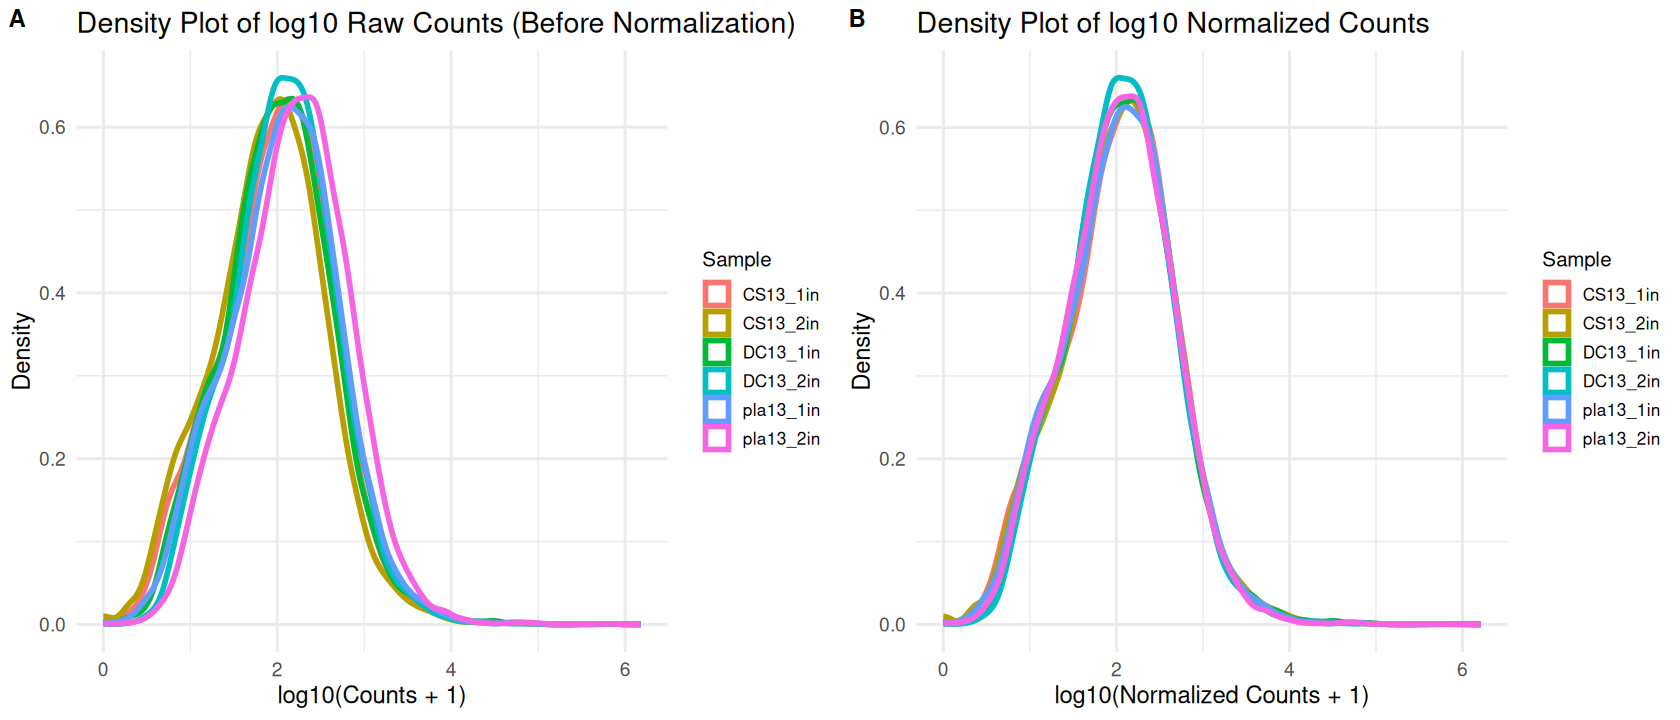

In [20]:
# Extract raw counts and log-transform
raw_counts <- counts(dds, normalized = FALSE)
raw_log_counts <- log10(raw_counts + 1)

# Convert to long format for ggplot2
log1_df <- as.data.frame(raw_log_counts)
log1_df$Gene <- rownames(log1_df)
log1_long <- pivot_longer(log1_df, -Gene, names_to = "Sample", values_to = "log10_count")

# Extrac13t normalized counts and log-transform
norm_counts <- counts(dds, normalized = TRUE)
norm_log_counts <- log10(norm_counts + 1)

# Convert to long format for ggplot2
log2_df <- as.data.frame(norm_log_counts)
log2_df$Gene <- rownames(log2_df)
log2_long <- pivot_longer(log2_df, -Gene, names_to = "Sample", values_to = "log10_count")

# Plot with ggplot2
p1 = ggplot(log1_long, aes(x = log10_count, color = Sample)) +
  geom_density(size = 1.2, alpha = 0.8) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Density Plot of log10 Raw Counts (Before Normalization)",
    x = "log10(Counts + 1)",
    y = "Density"
  ) +
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    legend.position = "right"
  )
# Plot with ggplot2
p2 = ggplot(log2_long, aes(x = log10_count, color = Sample)) +
  geom_density(size = 1.2, alpha = 0.8) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Density Plot of log10 Normalized Counts",
    x = "log10(Normalized Counts + 1)",
    y = "Density"
  ) +
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    legend.position = "right"
  )

# Combine side-by-side
options(repr.plot.width = 14, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, align = 'h')

In [21]:
print("printing the results")
resultsNames(dds)

[1] "printing the results"


[1] "Intercept"               "condition_CS13_vs_pla13"
[3] "condition_DC13_vs_pla13"

In [22]:
# Show the colData table (all sample metadata)
colData(dds)

# View just the 'condition' column
dds$condition

# Count samples per condition
table(dds$condition)

# Show levels (if it's a factor)
levels(dds$condition)

DataFrame with 6 rows and 2 columns
          condition sizeFactor
           <factor>  <numeric>
CS13_1in      CS13    0.902121
CS13_2in      CS13    0.738268
DC13_1in      DC13    0.930076
DC13_2in      DC13    1.068206
pla13_1in     pla13   1.077370
pla13_2in     pla13   1.514589

[1] CS13  CS13  DC13  DC13  pla13 pla13
Levels: pla13 CS13 DC13


pla13  CS13  DC13 
    2     2     2 

[1] "pla13" "CS13"  "DC13"

In [23]:
levels(dds$condition)
# [1] "pla13" "CS13" "DC13"

[1] "pla13" "CS13"  "DC13"

In [24]:
print("No shrinkage")

# Get results for different comparisons
res_CS13_vs_DC13 <- results(dds, contrast = c("condition", "CS13", "DC13"))
res_CS13_vs_pla13 <- results(dds, contrast = c("condition", "CS13", "pla13"))
res_DC13_vs_pla13 <- results(dds, contrast = c("condition", "DC13", "pla13"))

# summary(res_CS13_vs_DC13)
# summary(res_DC13_vs_pla13)
# summary(res_CS13_vs_pla13)

# Spla13e results
write.csv(as.data.frame(res_CS13_vs_DC13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_DC13_results.csv")
write.csv(as.data.frame(res_CS13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_pla13_results.csv")
write.csv(as.data.frame(res_DC13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_DC13_vs_pla13_results.csv")

###########################################################
###########################################################

print("number of differentially bound transcripts : CS13 vs DC13 : pvalue < 0.05 and padj < 0.1")
dim(subset(res_CS13_vs_DC13, pvalue < 0.05))[1]
dim(subset(res_CS13_vs_DC13, padj < 0.1))[1]

print("number of differentially bound transcripts : CS13 vs pla13 : pvalue < 0.05 and padj < 0.1")
dim(subset(res_CS13_vs_pla13, pvalue < 0.05))[1]
dim(subset(res_CS13_vs_pla13, padj < 0.1))[1]

print("number of differentially bound transcripts : DC13 vs pla13 : pvalue < 0.05 and padj < 0.1")
dim(subset(res_DC13_vs_pla13, pvalue < 0.05))[1]
dim(subset(res_DC13_vs_pla13, padj < 0.1))[1]

###########################################################
###########################################################

[1] "No shrinkage"
[1] "number of differentially bound transcripts : CS13 vs DC13 : pvalue < 0.05 and padj < 0.1"


[1] 1040

[1] 315

[1] "number of differentially bound transcripts : CS13 vs pla13 : pvalue < 0.05 and padj < 0.1"


[1] 2045

[1] 1557

[1] "number of differentially bound transcripts : DC13 vs pla13 : pvalue < 0.05 and padj < 0.1"


[1] 2631

[1] 2274

In [25]:
cat("Available contrasts in resultsNames(dds):\n")
print(resultsNames(dds))

Available contrasts in resultsNames(dds):
[1] "Intercept"               "condition_CS13_vs_pla13"
[3] "condition_DC13_vs_pla13"


In [26]:
# type = c("apeglm", "ashr", "normal")

In [27]:
print("Data shrinkage : normal lfcShrink")

[1] "Data shrinkage : normal lfcShrink"


In [28]:
# Get results for different comparisons

resLFCnormal_CS13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "CS13", "pla13"), type="normal")
resLFCnormal_DC13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "DC13", "pla13"), type="normal")
resLFCnormal_CS13_vs_DC13 <- lfcShrink(dds, contrast = c("condition", "CS13", "DC13"), type="normal")

# summary(resLFCnormal_CS13_vs_DC13)
# summary(resLFCnormal_DC13_vs_pla13)
# summary(resLFCnormal_CS13_vs_pla13)

# Spla13e results
write.csv(as.data.frame(resLFCnormal_CS13_vs_DC13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_DC13_results.resLFCnormal.csv")
write.csv(as.data.frame(resLFCnormal_CS13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_pla13_results.resLFCnormal.csv")
write.csv(as.data.frame(resLFCnormal_DC13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_DC13_vs_pla13_results.resLFCnormal.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCnormal: CS13 vs DC13 : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_CS13_vs_DC13, pvalue < 0.05))
dim(subset(resLFCnormal_CS13_vs_DC13, padj < 0.1))

print("number of differentially bound and expressed transcripts : resLFCnormal : CS13 vs pla13 : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_CS13_vs_pla13, pvalue < 0.05))
dim(subset(resLFCnormal_CS13_vs_pla13, padj < 0.1))

print("number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_DC13_vs_pla13, pvalue < 0.05))
dim(subset(resLFCnormal_DC13_vs_pla13, padj < 0.1))

###########################################################
###########################################################

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



[1] "number of differentially bound and expressed transcripts : resLFCnormal: CS13 vs DC13 : pvalue < 0.05 and padj < 0.1"


[1] 1040    6

[1] 315   6

[1] "number of differentially bound and expressed transcripts : resLFCnormal : CS13 vs pla13 : pvalue < 0.05 and padj < 0.1"


[1] 2045    6

[1] 1557    6

[1] "number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05 and padj < 0.1"


[1] 2631    6

[1] 2274    6

In [29]:
print("Data shrinkage : ashr lfcShrink")

[1] "Data shrinkage : ashr lfcShrink"


In [30]:
# If you must use contrast, you should use type="normal" or type="ashr" instead of apeglm, 
# because apeglm only works with coef.  
# apeglm is the recommended method for log-fold change shrinkage.

# Get results for different comparisons
# resLFCCS13eglm_CS13_vs_pla13 <- lfcShrink(dds, coef = "condition_CS13_vs_pla13", type="CS13eglm")
# resLFCCS13eglm_DC13_vs_pla13 <- lfcShrink(dds, coef = "condition_DC13_vs_pla13", type="CS13eglm")

resLFCashr_CS13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "CS13", "pla13"), type="ashr")
resLFCashr_DC13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "DC13", "pla13"), type="ashr")
resLFCashr_CS13_vs_DC13 <- lfcShrink(dds, contrast = c("condition", "CS13", "DC13"), type="ashr")

# summary(resLFCashr_CS13_vs_DC13)
# summary(resLFCashr_DC13_vs_pla13)
# summary(resLFCashr_CS13_vs_pla13)

# Spla13e results
write.csv(as.data.frame(resLFCashr_CS13_vs_DC13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_DC13_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_CS13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_pla13_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_DC13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_DC13_vs_pla13_results.resLFCashr.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCashr : CS13 vs DC13 : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_CS13_vs_DC13, pvalue < 0.05))[1]
dim(subset(resLFCashr_CS13_vs_DC13, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : CS13 vs pla13 : pvalue < 0.05 ")
dim(subset(resLFCashr_CS13_vs_pla13, pvalue < 0.05))[1]
dim(subset(resLFCashr_CS13_vs_pla13, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05")
dim(subset(resLFCashr_DC13_vs_pla13, pvalue < 0.05))[1]
dim(subset(resLFCashr_DC13_vs_pla13, padj < 0.1))[1]

###########################################################
###########################################################

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



[1] "number of differentially bound and expressed transcripts : resLFCashr : CS13 vs DC13 : pvalue < 0.05 and padj < 1"


[1] 1040

[1] 315

[1] "number of differentially bound and expressed transcripts : resLFCashr : CS13 vs pla13 : pvalue < 0.05 "


[1] 2045

[1] 1557

[1] "number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05"


[1] 2631

[1] 2274

In [31]:
# If you must use contrast, you should use type="normal" or type="ashr" instead of CS13eglm, 
# because CS13eglm only works with coef.  
# CS13eglm is the recommended method for log-fold change shrinkage.

# Get results for different comparisons
# resLFCCS13eglm_CS13_vs_pla13 <- lfcShrink(dds, coef = "condition_CS13_vs_pla13", type="CS13eglm")
# resLFCCS13eglm_DC13_vs_pla13 <- lfcShrink(dds, coef = "condition_DC13_vs_pla13", type="CS13eglm")

resLFCashr_CS13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "CS13", "pla13"), type="ashr")
resLFCashr_DC13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "DC13", "pla13"), type="ashr")
resLFCashr_CS13_vs_DC13 <- lfcShrink(dds, contrast = c("condition", "CS13", "DC13"), type="ashr")

# summary(resLFCashr_CS13_vs_DC13)
# summary(resLFCashr_DC13_vs_pla13)
# summary(resLFCashr_CS13_vs_pla13)

# Spla13e results
write.csv(as.data.frame(resLFCashr_CS13_vs_DC13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_DC13_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_CS13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_pla13_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_DC13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_DC13_vs_pla13_results.resLFCashr.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCashr : CS13 vs DC13 : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_CS13_vs_DC13, pvalue < 0.05))[1]
dim(subset(resLFCashr_CS13_vs_DC13, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : CS13 vs pla13 : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_CS13_vs_pla13, pvalue < 0.05))[1]
dim(subset(resLFCashr_CS13_vs_pla13, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_DC13_vs_pla13, pvalue < 0.05))[1]
dim(subset(resLFCashr_DC13_vs_pla13, padj < 0.1))[1]

###########################################################
###########################################################

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



[1] "number of differentially bound and expressed transcripts : resLFCashr : CS13 vs DC13 : pvalue < 0.05 and padj < 1"


[1] 1040

[1] 315

[1] "number of differentially bound and expressed transcripts : resLFCashr : CS13 vs pla13 : pvalue < 0.05 and padj < 1"


[1] 2045

[1] 1557

[1] "number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05 and padj < 1"


[1] 2631

[1] 2274

[1] "Comparing the number of DE genes for the comparison : CS13 vs DC13 for a pvalue < 0.05"
[1] "Comparing the number of DE genes for the comparison : CS13 vs DC13 for a pvalue < 0.05"


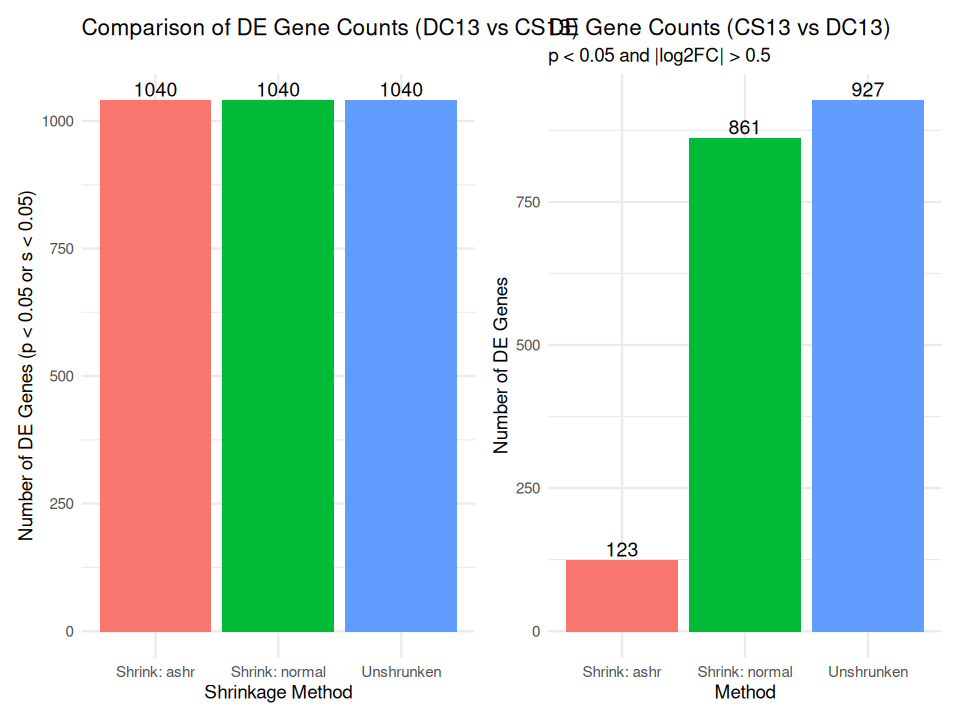

In [32]:
print("Comparing the number of DE genes for the comparison : CS13 vs DC13 for a pvalue < 0.05")

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

# The information about DE peaks was stored in :
# res_CS13_vs_DC13 
# res_CS13_vs_pla13 
# res_DC13_vs_pla13 

# resLFCnormal_CS13_vs_pla13
# resLFCnormal_DC13_vs_pla13 
# resLFCnormal_CS13_vs_DC13 

# resLFCashr_CS13_vs_pla13 
# resLFCashr_DC13_vs_pla13 
# resLFCashr_CS13_vs_DC13 

# Count DEGs
n_DE_unshrunken <- sum(res_CS13_vs_DC13$pvalue < 0.05, na.rm = TRUE)
n_DE_shrink_normal <- sum(resLFCnormal_CS13_vs_DC13$pvalue < 0.05, na.rm = TRUE)  # Same p-values as unshrunken
n_DE_ashr <- sum( resLFCashr_CS13_vs_DC13$pvalue < 0.05, na.rm = TRUE)            # Same p-values as unshrunken

# Build a data frame
compare_df1 <- data.frame(
  Method = c("Unshrunken", "Shrink: normal", "Shrink: ashr"),
  DE_Genes = c(n_DE_unshrunken, n_DE_shrink_normal, n_DE_ashr)
)

# Plot it
p1 = ggplot(compare_df1, aes(x = Method, y = DE_Genes, fill = Method)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "Comparison of DE Gene Counts (DC13 vs CS13)",
    y = "Number of DE Genes (p < 0.05 or s < 0.05)",
    x = "Shrinkage Method"
  ) +
  theme(legend.position = "none") +
  geom_text(aes(label = DE_Genes), vjust = -0.3, size = 4)

print("Comparing the number of DE genes for the comparison : CS13 vs DC13 for a pvalue < 0.05")

# Shrinkage Methods: The lfcShrink() function in DESeq2 is used to obtain more DC13curate estimates of log2 fold changes, 
# especially for genes with low counts or high variability.
# Threshold Selection: The choice of a log2FC threshold (e.g., 0.3) is somewhat arbitrary and should be based on the biological context 
# and the desired stringency of the analysis.
# Interpretation: Comparing the number of DE genes DC13ross different shrinkage methods can provide insights into the robustness of your findings. 
# It's common to observe variations in the number of DE genes identified, depending on the method used.

# Raw (non-shrunk)
n_raw <- sum(res_CS13_vs_DC13$pvalue < pval_cutoff & abs(res_CS13_vs_DC13$log2FoldChange) > lfc_cutoff, na.rm = TRUE)
# Normal shrink
n_normal <- sum(res_CS13_vs_DC13$pvalue < pval_cutoff & abs(resLFCnormal_CS13_vs_DC13$log2FoldChange) > lfc_cutoff, na.rm = TRUE)
# Ashr shrink (using s-value instead of p-value)
n_ashr <- sum(resLFCashr_CS13_vs_DC13$pvalue < pval_cutoff & abs(resLFCashr_CS13_vs_DC13$log2FoldChange) > lfc_cutoff, na.rm = TRUE)

# Combine into a data frame
compare_df2 <- data.frame(
  Method = c("Unshrunken", "Shrink: normal", "Shrink: ashr"),
  DE_Genes = c(n_raw, n_normal, n_ashr)
)

p2 = ggplot(compare_df2, aes(x = Method, y = DE_Genes, fill = Method)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "DE Gene Counts (CS13 vs DC13)",
    subtitle = "p < 0.05 and |log2FC| > 0.5",
    y = "Number of DE Genes",
    x = "Method"
  ) +
  geom_text(aes(label = DE_Genes), vjust = -0.3, size = 4) +
  theme(legend.position = "none")


# Print the plot in Jupyter
options(repr.plot.width = 8, repr.plot.height = 6)
p1 + p2

In [33]:
print("MA plots:")

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

[1] "MA plots:"


In [34]:
make_MA_plot <- function(res_df, title = "MA Plot", lfc_cutoff = 0.3, pval_cutoff = 0.1, ylim = c(-2, 2)) {
  
  res_df <- as.data.frame(res_df)
  
  # ReplDC13e NA p-values with the threshold so they are not considered significant
  res_df$pvalue[is.na(res_df$pvalue)] <- 1
  
  # Label significance based on thresholds
  res_df$sig <- ifelse(res_df$pvalue < pval_cutoff & abs(res_df$log2FoldChange) > lfc_cutoff,
                       "Significant", "Not Significant")

  # Generate the MA plot
  ggplot(res_df, aes(x = baseMean, y = log2FoldChange, color = sig)) +
    geom_point(alpha = 0.6, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("Significant" = "#D7263D", "Not Significant" = "gray70")) +
    geom_hline(yintercept = c(-lfc_cutoff, lfc_cutoff), linetype = "dashed", color = "black") +
    coord_cartesian(ylim = ylim) +
    theme_minimal(base_size = 14) +
    labs(
      title = title,
      x = "Mean Expression (log10 scale)",
      y = "log2 Fold Change",
      color = "Significance"
    ) +
    theme(
      legend.position = "right",
      panel.grid.minor = element_blank()
    )
}


[1] "MA plots:"
[1] "CS13 vs DC13"


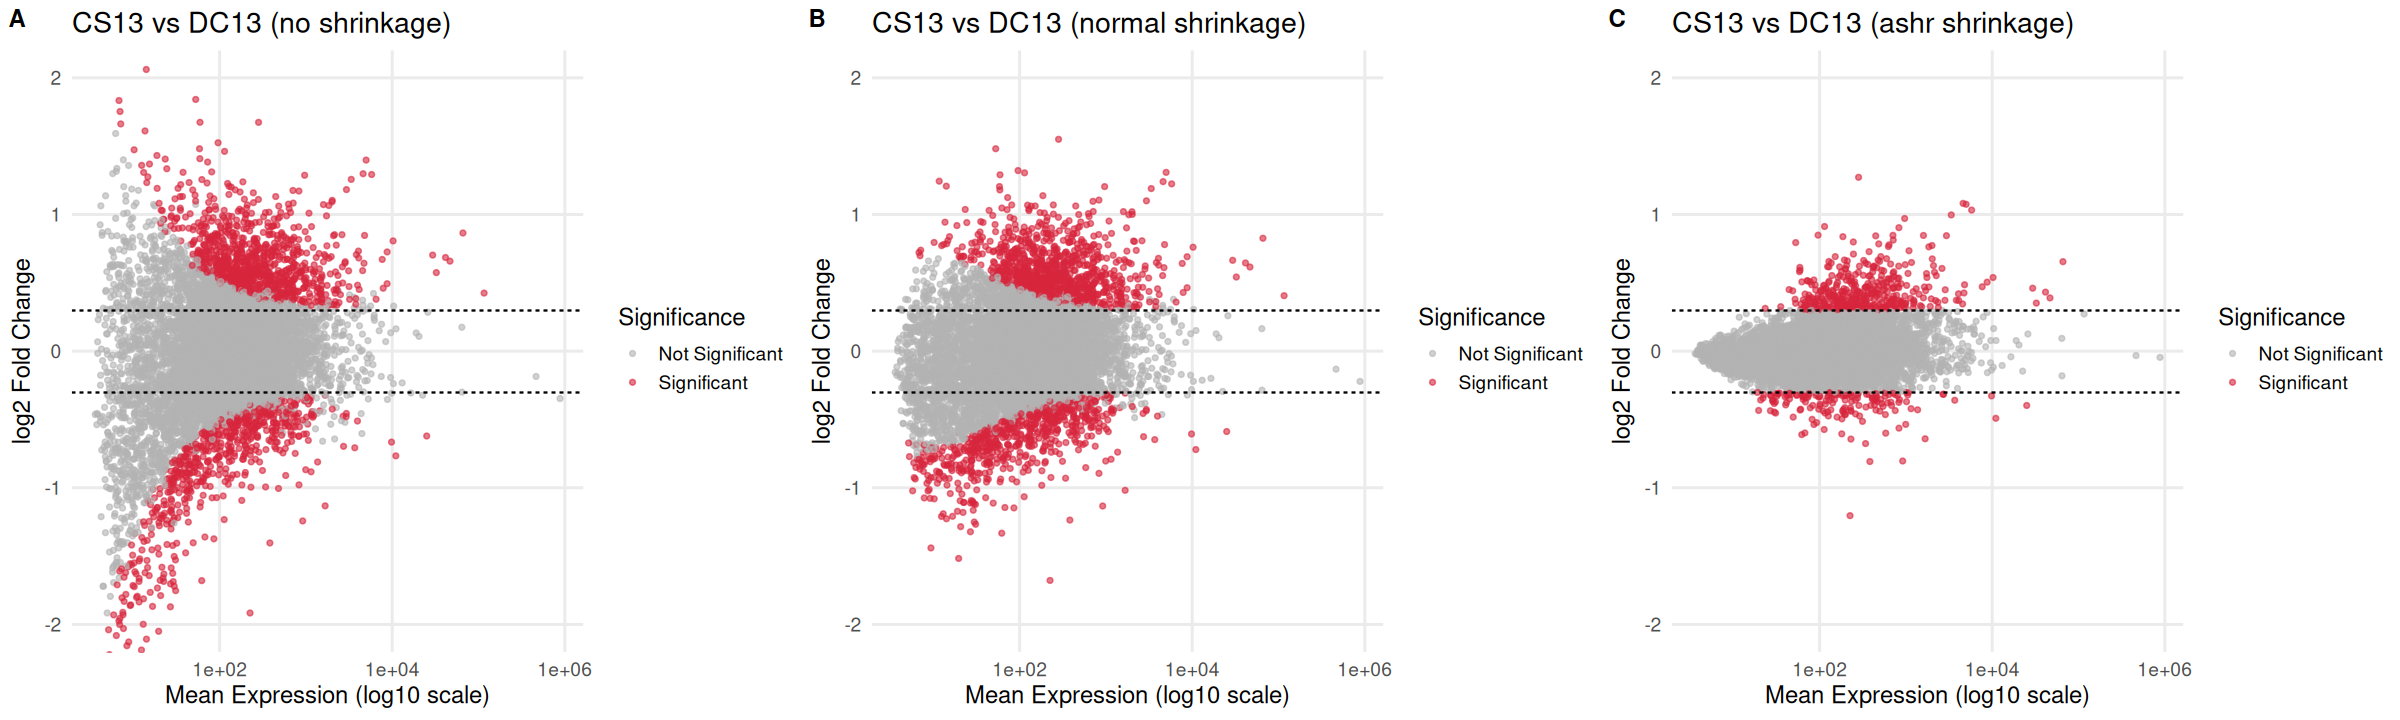

In [35]:
print("MA plots:")
print("CS13 vs DC13")

# Create the plots
p1 <- make_MA_plot(res_CS13_vs_DC13, title = "CS13 vs DC13 (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_CS13_vs_DC13, title = "CS13 vs DC13 (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_CS13_vs_DC13, title = "CS13 vs DC13 (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 20, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "MA plots:"
[1] "DC13 vs pla13"


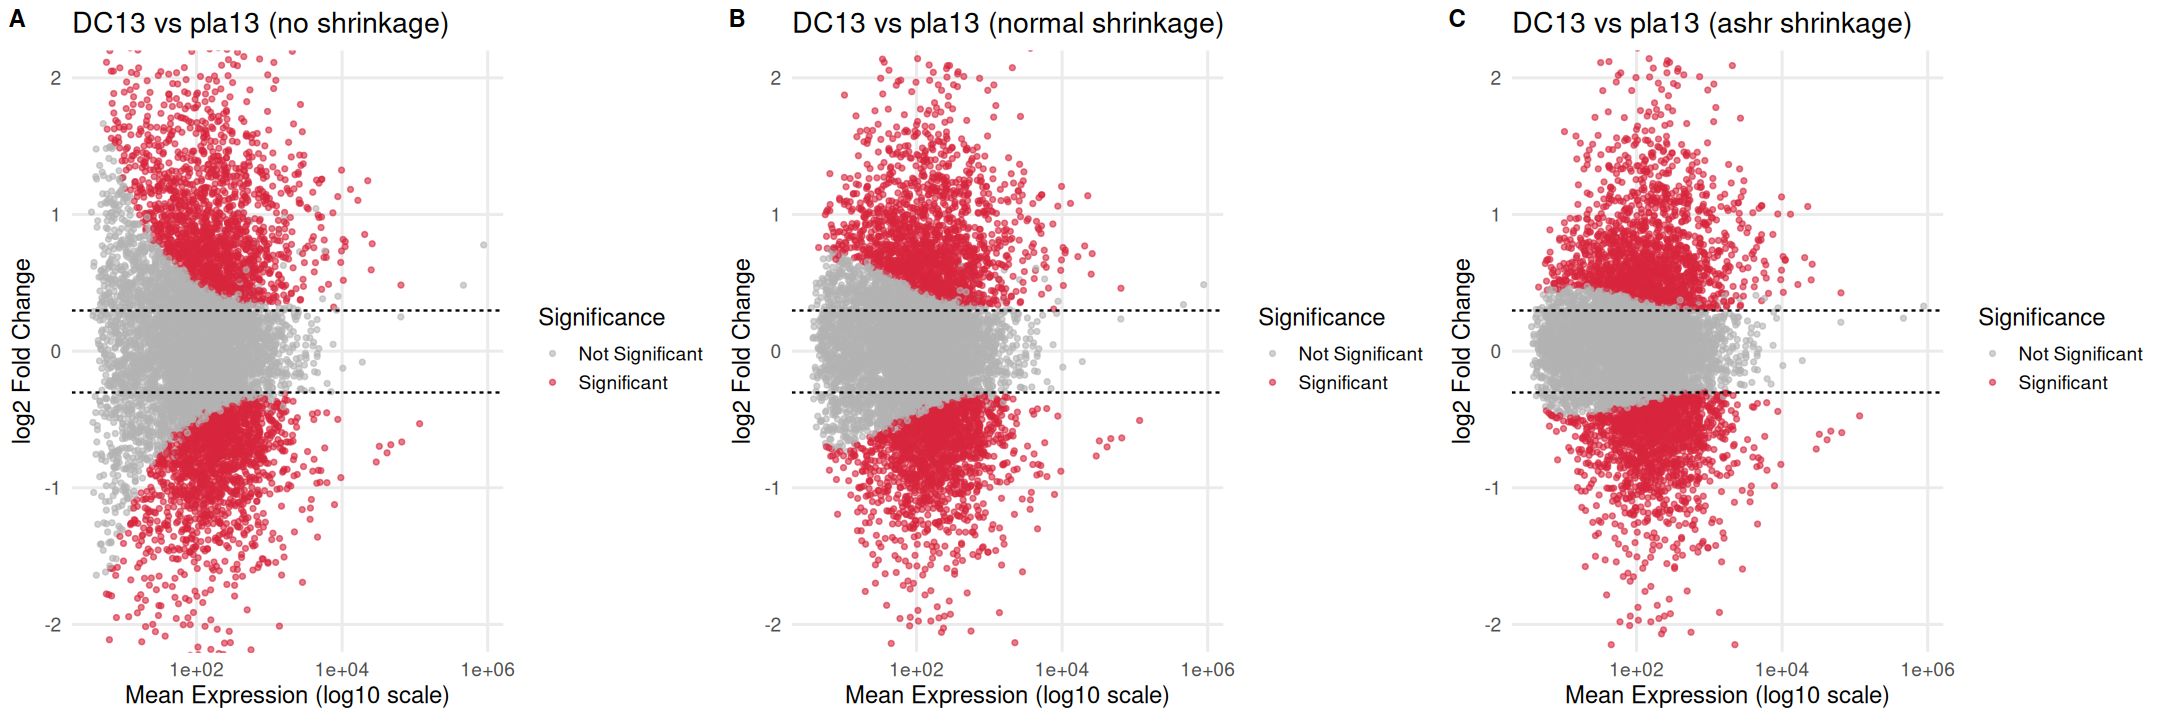

In [36]:
print("MA plots:")
print("DC13 vs pla13")

# Create the plots
p1 <- make_MA_plot(res_DC13_vs_pla13, title = "DC13 vs pla13 (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_DC13_vs_pla13, title = "DC13 vs pla13 (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_DC13_vs_pla13, title = "DC13 vs pla13 (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 18, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "MA plots:"
[1] "CS13 vs pla13"


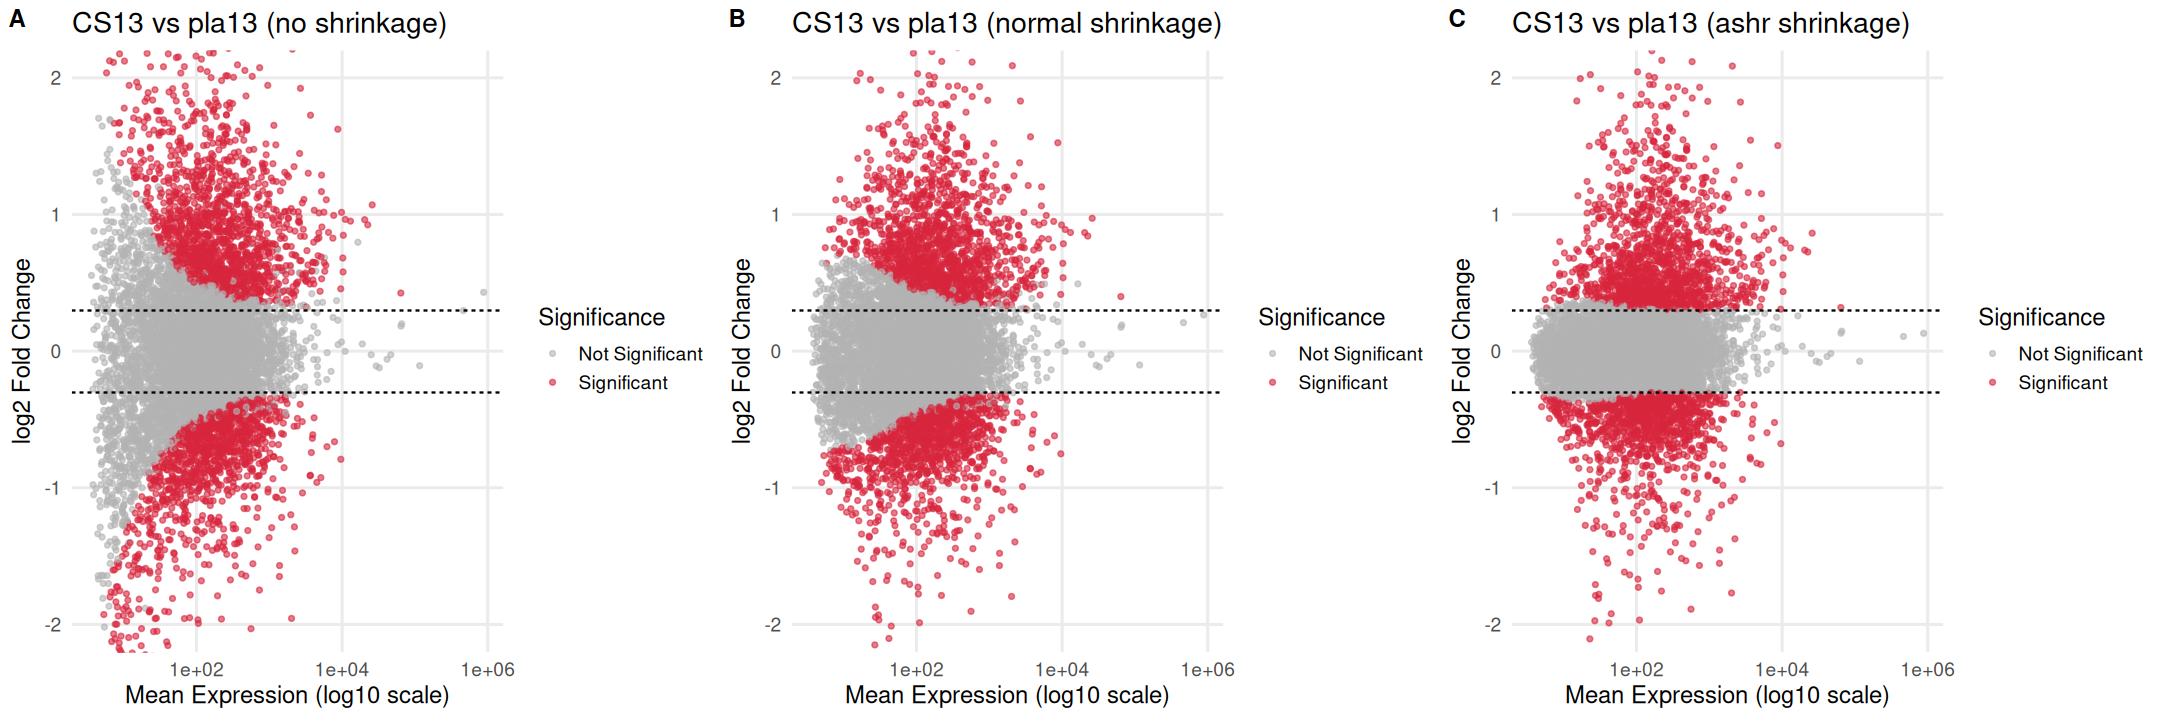

In [37]:
print("MA plots:")
print("CS13 vs pla13")

# Create the plots
p1 <- make_MA_plot(res_CS13_vs_pla13, title = "CS13 vs pla13 (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_CS13_vs_pla13, title = "CS13 vs pla13 (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_CS13_vs_pla13, title = "CS13 vs pla13 (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 18, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "plotting dispersion"


function (q) 
coefs[1] + coefs[2]/q
<bytecode: 0x6176aedbd8f8>
<environment: 0x6176aedbdf50>
attr(,"coefficients")
asymptDisp  extraPois 
0.02127962 1.94027074 
attr(,"fitType")
[1] "parametric"
attr(,"varLogDispEsts")
[1] 0.6652738
attr(,"dispPriorVar")
[1] 0.25

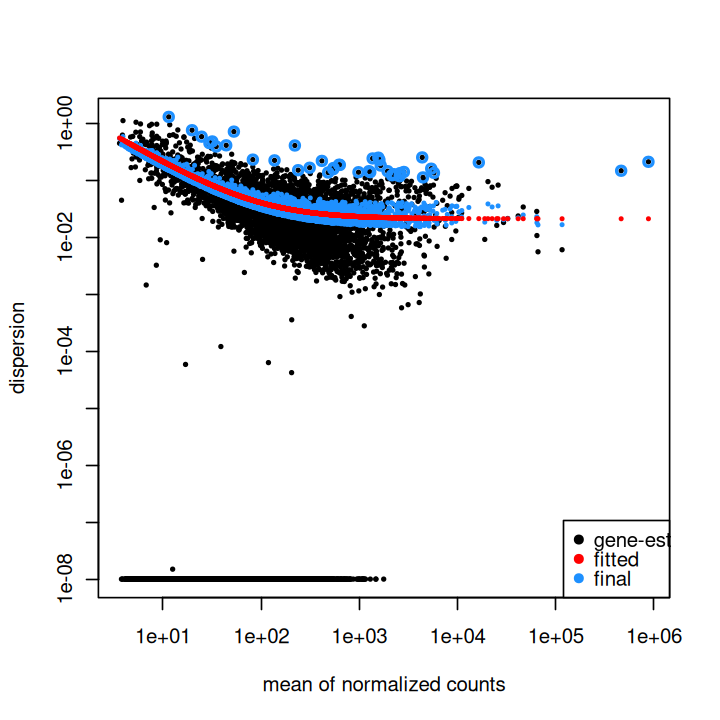

In [38]:
print("plotting dispersion")

# Combine side-by-side
options(repr.plot.width = 6, repr.plot.height = 6)

plotDispEsts(dds)
dispersionFunction(dds)

In [39]:
print("RLD and VST transformations")

# Effects of transformations on the variance
rld <- rlog(dds, blind = FALSE)  
vsd <- vst(dds, blind = FALSE) 
ntd <- normTransform(dds)
# meanSdPlot(assay(ntd))
# meanSdPlot(assay(rld))
# meanSdPlot(assay(vsd))

[1] "RLD and VST transformations"


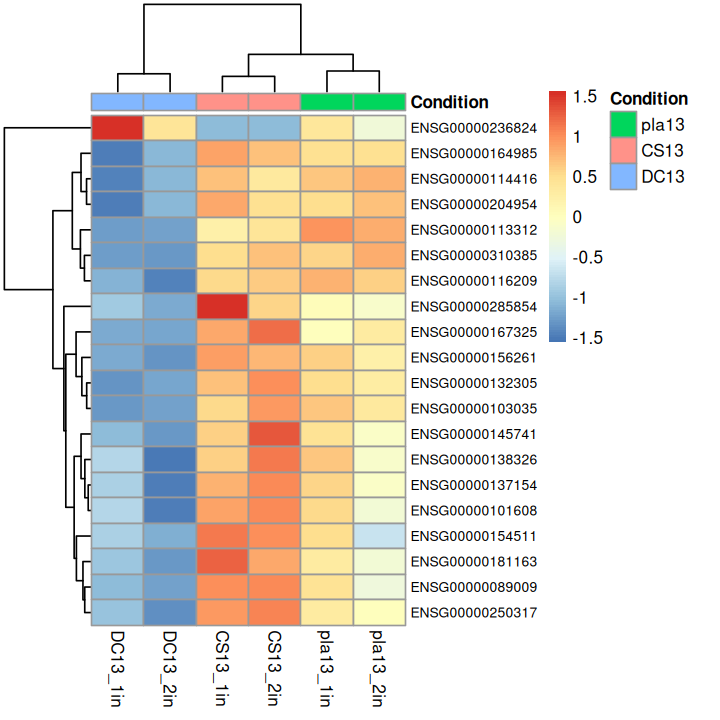

In [40]:
library("pheatmap")

# Select the top 20 differentially expressed genes based on adjusted p-value
top_genes <- rownames(res_CS13_vs_DC13)[order(res_CS13_vs_DC13$padj, na.last=NA)][1:20]  #

# ExtrDC13t normalized transformed counts for the top genes
top_counts <- assay(vsd)[top_genes, ]

# Create annotation dataframe
df <- as.data.frame(colData(dds)["condition"])  # Ensure it is a proper dataframe
colnames(df) <- "Condition"  # Rename column for clarity

# Generate heatmCS13
options(repr.plot.width = 6, repr.plot.height = 6)
pheatmap(top_counts, 
         cluster_rows=TRUE,  # Cluster rows to group similar genes
         show_rownames=TRUE,  # Show gene names
         cluster_cols=TRUE,  # Cluster samples
         annotation_col=df,  # Add sample condition annotations
         scale="row",  # Normalize eDC13h gene's expression DC13ross samples
         fontsize_row=8)  # Adjust row text size for readability

In [41]:
print("PCA and MDS plots of rlog- and vst-transformed counts")

[1] "PCA and MDS plots of rlog- and vst-transformed counts"


using ntop=500 top features by variance

using ntop=500 top features by variance



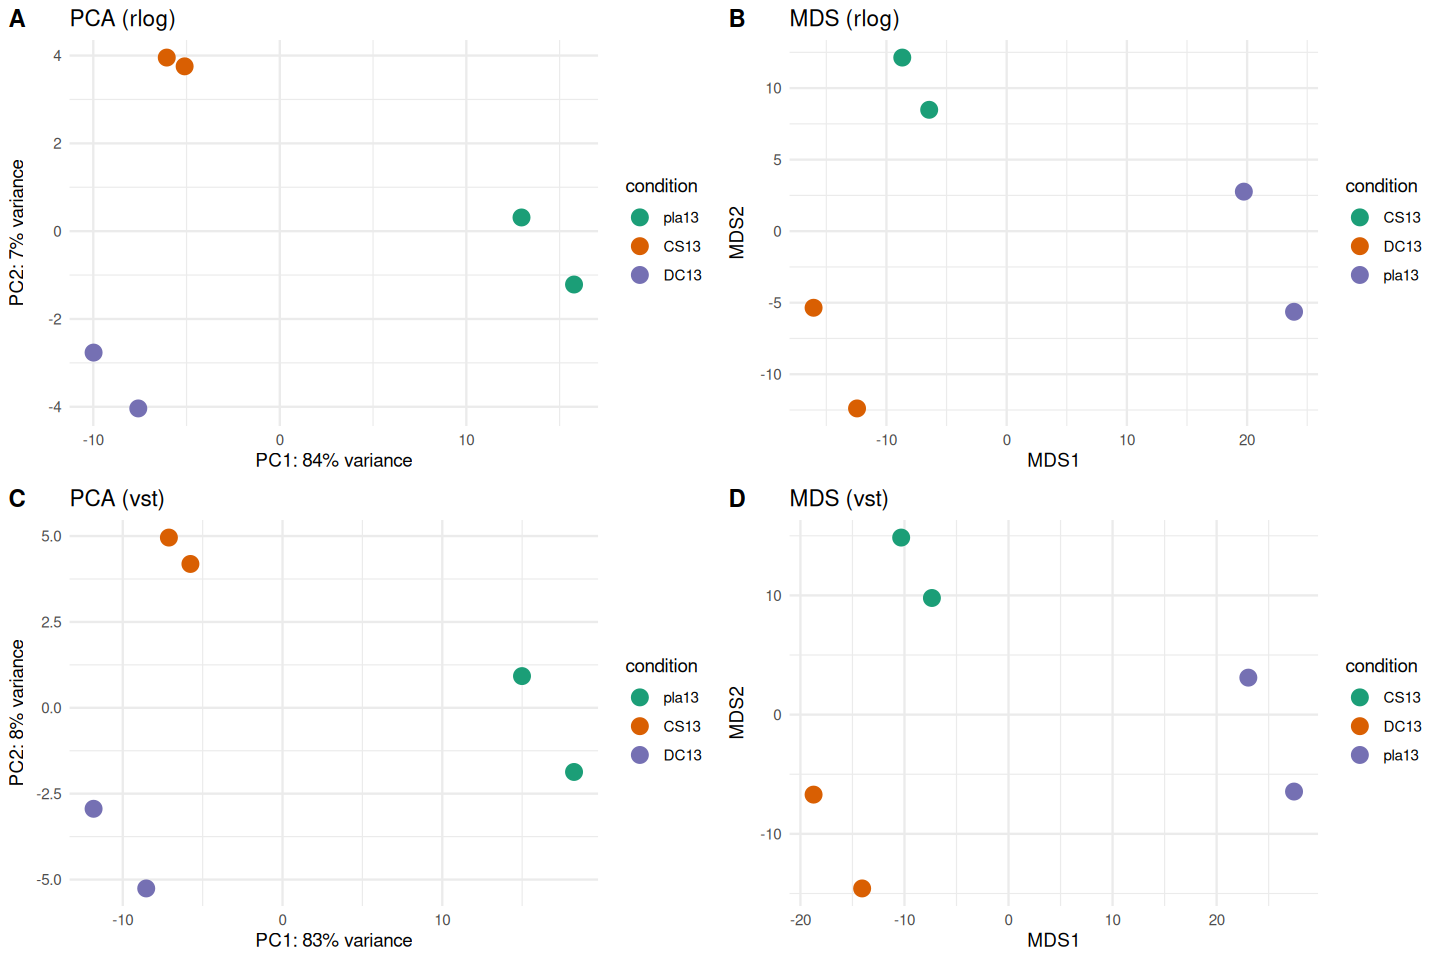

In [42]:

# 1. rlog transformation and PCA
rld <- rlog(dds, blind = FALSE)
pca_rld <- plotPCA(rld, intgroup = "condition", returnData = TRUE)
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

pca_rld_plot <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  xlab(paste0("PC1: ", percentVar_rld[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar_rld[2], "% variance")) +
  ggtitle("PCA (rlog)") +
  theme_minimal()

# 2. rlog MDS
dists_rld <- dist(t(assay(rld)))
mds_rld <- cmdscale(as.matrix(dists_rld))
mds_rld_df <- data.frame(MDS1 = mds_rld[,1], MDS2 = mds_rld[,2], condition = col_data$condition)

mds_rld_plot <- ggplot(mds_rld_df, aes(MDS1, MDS2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("MDS (rlog)") +
  theme_minimal()

# 3. vst transformation and PCA
vsd <- vst(dds, blind = FALSE)
pca_vsd <- plotPCA(vsd, intgroup = "condition", returnData = TRUE)
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))

pca_vsd_plot <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  xlab(paste0("PC1: ", percentVar_vsd[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar_vsd[2], "% variance")) +
  ggtitle("PCA (vst)") +
  theme_minimal()

# 4. vst MDS
dists_vsd <- dist(t(assay(vsd)))
mds_vsd <- cmdscale(as.matrix(dists_vsd))
mds_vsd_df <- data.frame(MDS1 = mds_vsd[,1], MDS2 = mds_vsd[,2], condition = col_data$condition)

mds_vsd_plot <- ggplot(mds_vsd_df, aes(MDS1, MDS2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("MDS (vst)") +
  theme_minimal()

# Combine side-by-side
options(repr.plot.width = 12, repr.plot.height = 8)
# Combine all plots in a 2x2 grid
plot_grid(
  pca_rld_plot, mds_rld_plot,
  pca_vsd_plot, mds_vsd_plot,
  labels = c("A", "B", "C", "D"),
  ncol = 2, align = "hv"
)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine




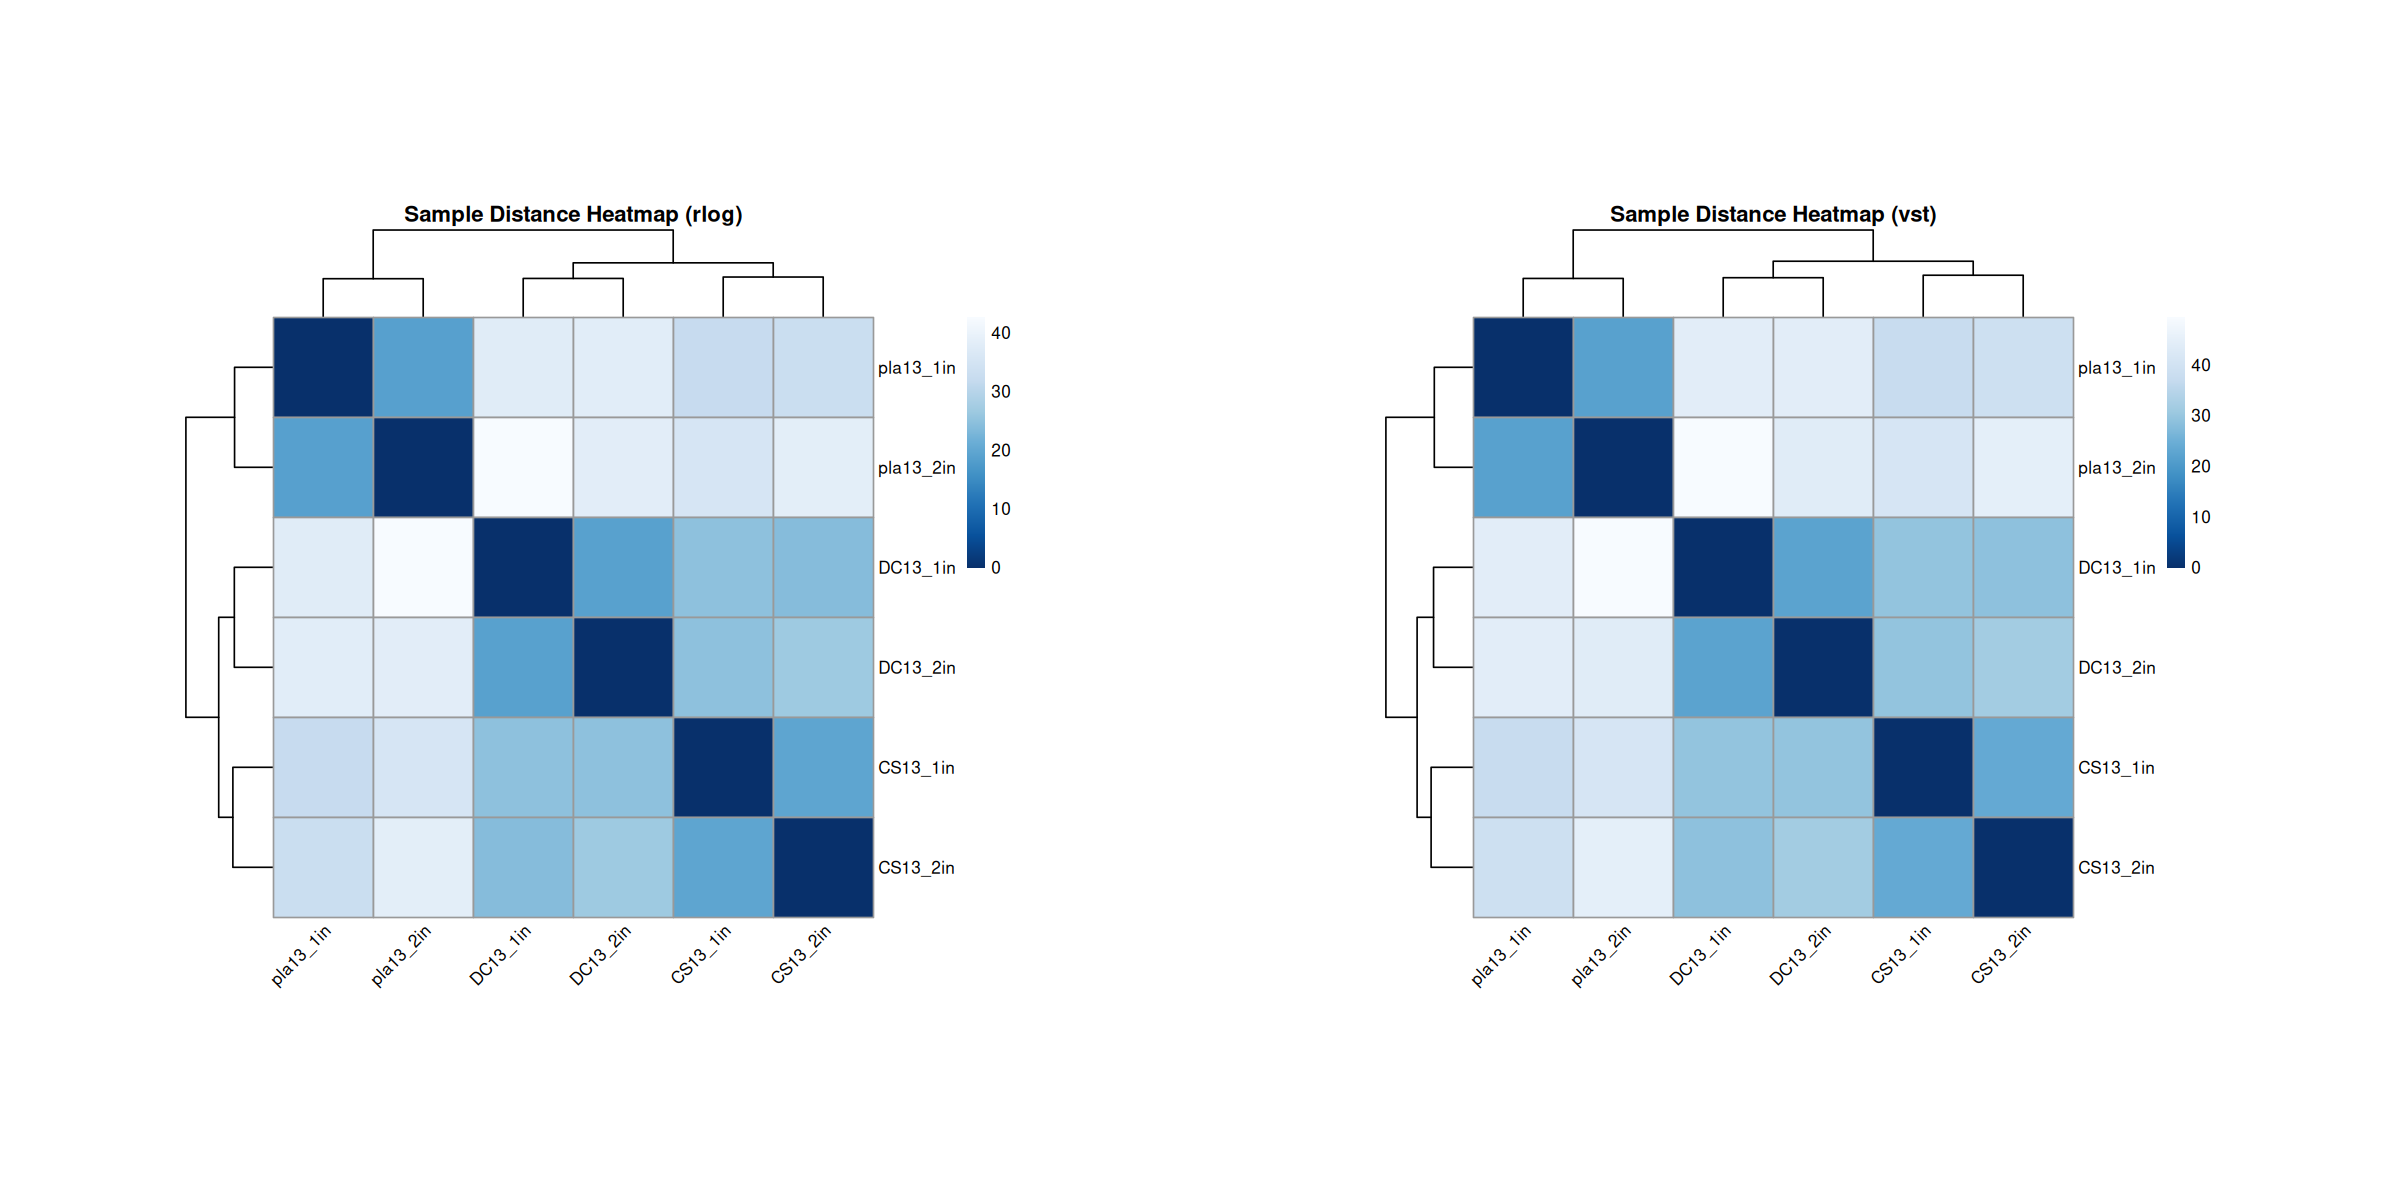

In [43]:
library(pheatmap)
library(RColorBrewer)
library(gridExtra)
library(grid)

# === RLOG HeatmCS13 ===
rlog_matrix <- assay(rld)
sampleDists_rlog <- dist(t(rlog_matrix))
sampleDistMatrix_rlog <- as.matrix(sampleDists_rlog)
colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)

p1 <- pheatmap(sampleDistMatrix_rlog,
               clustering_distance_rows = sampleDists_rlog,
               clustering_distance_cols = sampleDists_rlog,
               col = colors,
               fontsize_row = 10,
               fontsize_col = 10,
               cellwidth = 60,
               cellheight = 60,
               angle_col = 45,
               main = "Sample Distance Heatmap (rlog)",
               silent = TRUE)

# === VST HeatmCS13 ===
vsd_matrix <- assay(vsd)
sampleDists_vsd <- dist(t(vsd_matrix))
sampleDistMatrix_vsd <- as.matrix(sampleDists_vsd)

p2 <- pheatmap(sampleDistMatrix_vsd,
               clustering_distance_rows = sampleDists_vsd,
               clustering_distance_cols = sampleDists_vsd,
               col = colors,
               fontsize_row = 10,
               fontsize_col = 10,
               cellwidth = 60,
               cellheight = 60,
               angle_col = 45,
               main = "Sample Distance Heatmap (vst)",
               silent = TRUE)

# === Combine with spDC13ing and ensure layout fits ===
grid.newpage()  # Ensures fresh drawing surfDC13e

# Combine side-by-side
options(repr.plot.width = 20, repr.plot.height = 10)

# === Convert pheatmCS13 outputs to grobs ===
grob1 <- p1[[4]]
grob2 <- p2[[4]]

# === Combine with cowplot ===
cowplot::plot_grid(grob1, grob2, ncol = 2, rel_widths = c(1, 1))

In [44]:
print("Methods to use : GLM-PCA for PCA and PoissonDistance to calculate the sample distances")
# Another option for calculating sample distances is to use the Poisson Distance (Witten 2011), implemented in the PoiClDC13lu pDC13kage.
# This measure of dissimilarity between counts also takes the inherent variance structure of counts into consideration when calculating
# the distances between samples. The PoissonDistance function takes the original count matrix (not normalized) with samples as rows
# instead of columns, so we need to transpose the counts in dds.

[1] "Methods to use : GLM-PCA for PCA and PoissonDistance to calculate the sample distances"


[1] "PCA by using GLMPCA library. RLOG and VSD transformations are more suitable than scale()."


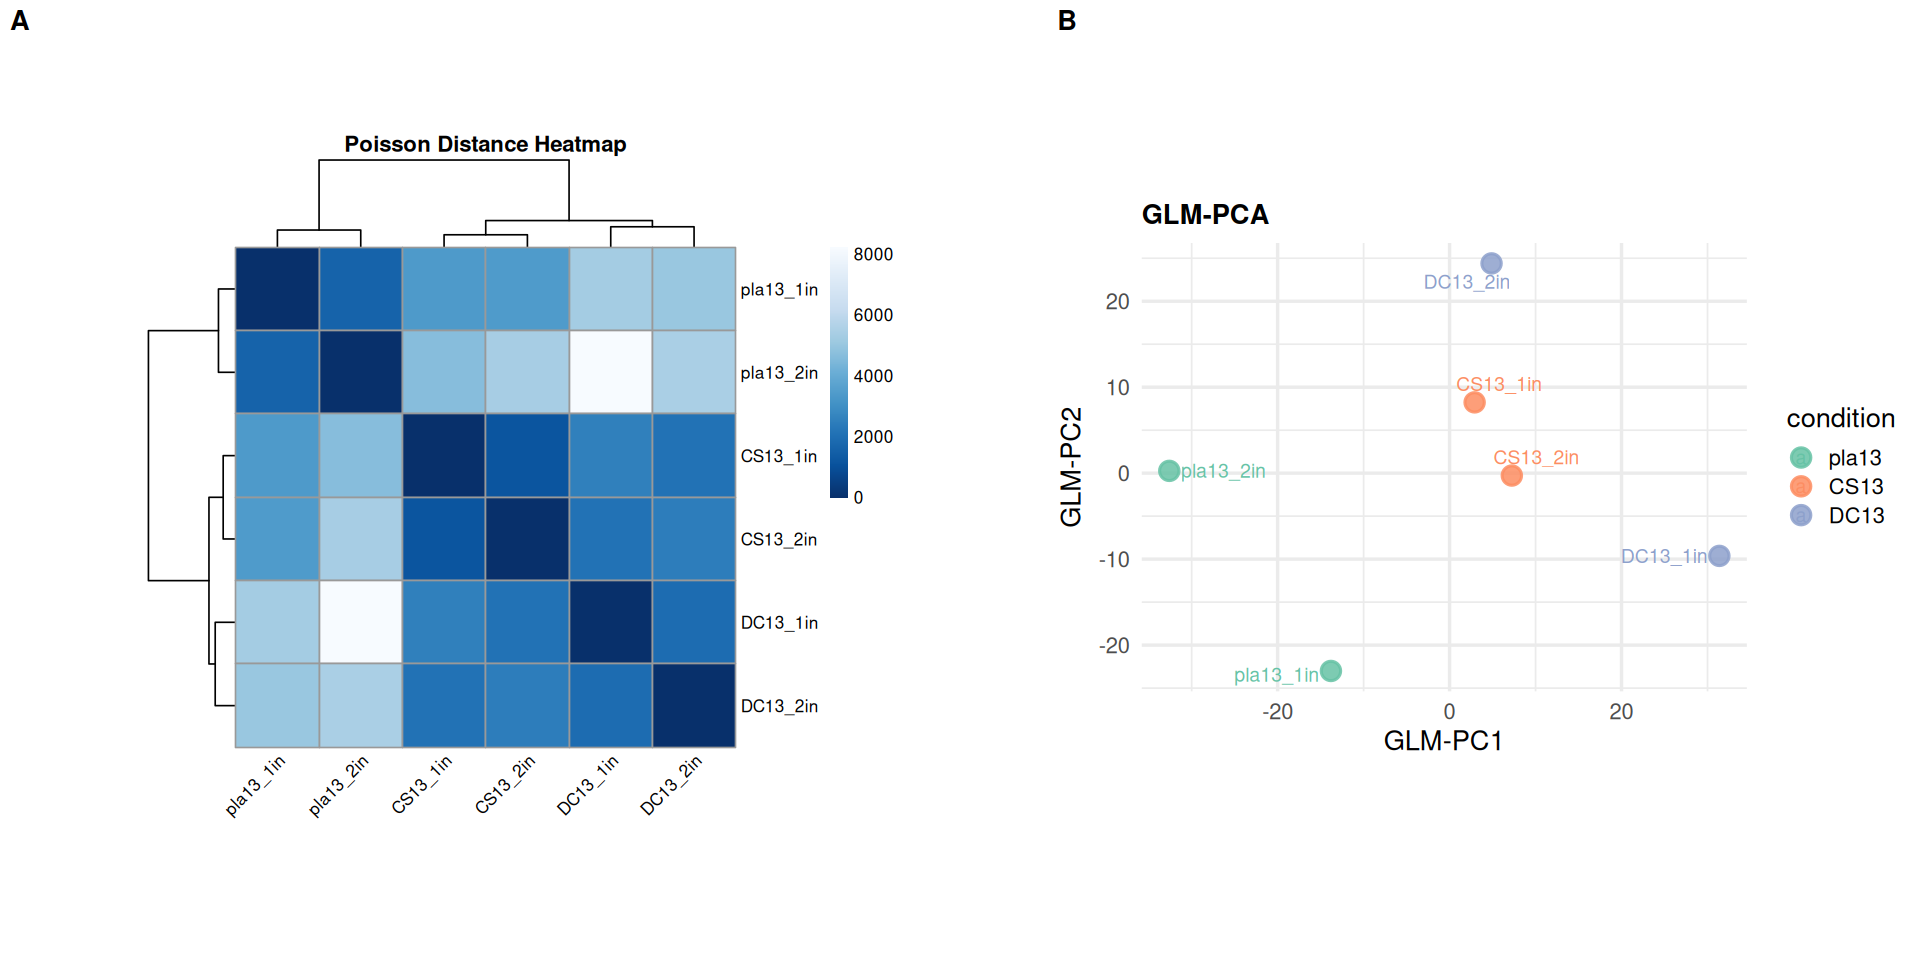

In [45]:
print("PCA by using GLMPCA library. RLOG and VSD transformations are more suitable than scale().")

# === GLM-PCA plot ===
gpca <- glmpca(assay(dds), L = 2)
gpca.dat <- gpca$factors
gpca.dat$sample <- colnames(dds)
gpca.dat$condition <- colData(dds)$condition

p_gpca <- ggplot(gpca.dat, aes(x = dim1, y = dim2, color = condition)) +
  geom_point(size = 4.5, alpha = 0.85, stroke = 1) +
  geom_text_repel(aes(label = sample), size = 4, box.padding = 0.4, max.overlaps = 8) +
  coord_fixed() +
  theme_minimal(base_size = 16) +
  labs(title = "GLM-PCA", x = "GLM-PC1", y = "GLM-PC2") +
  scale_color_brewer(palette = "Set2") +
  theme(
    legend.position = "right",
    plot.title = element_text(face = "bold", size = 16)
  )

# === Poisson distance heatmap ===
poisd <- PoissonDistance(t(counts(dds)))
samplePoisDistMatrix <- as.matrix(poisd$dd)

sample_names <- colnames(dds)
rownames(samplePoisDistMatrix) <- sample_names
colnames(samplePoisDistMatrix) <- sample_names

colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)

pheat <- pheatmap(samplePoisDistMatrix,
                  clustering_distance_rows = poisd$dd,
                  clustering_distance_cols = poisd$dd,
                  col = colors,
                  fontsize_row = 10,
                  fontsize_col = 10,
                  cellwidth = 50,
                  cellheight = 50,
                  angle_col = 45,
                  main = "Poisson Distance Heatmap",
                  silent = TRUE)

# Convert to grob for use with cowplot
g_poisson <- ggdraw(grobTree(pheat$gtable)) + theme(plot.margin = margin(5, 5, 5, 5))

# Set display size
options(repr.plot.width = 16, repr.plot.height = 8)

# Combine plots with cleaner spacing
combined_plot <- plot_grid(
  g_poisson, p_gpca,
  labels = c("A", "B"),
  label_size = 16,
  nrow = 1,
  rel_widths = c(1.2, 1)
)

# Print
print(combined_plot)

In [46]:
print("Performing Surrogate Variable Analysis")
print("SVA analysis")
# SV1, SV2, ... are surrogate variables — latent (hidden) fDC13tors estimated from the data that cCS13ture unwanted variation 
# (like batch effects, technical noise, or hidden biological subtypes).
# You can think of them as "virtual covariates" — constructed purely from the structure of your data — 
# that explain sources of variation not included in your model (like treatment or condition).

[1] "Performing Surrogate Variable Analysis"
[1] "SVA analysis"


In [47]:
print("If you see perfect correlation (1 or -1) between any two columns, 
       your design is collinear → and SVA breaks.")

[1] "If you see perfect correlation (1 or -1) between any two columns, \n       your design is collinear → and SVA breaks."


In [48]:
# === Prepare data ===
# dat  <- counts(dds, normalized = TRUE)
# idx  <- rowMeans(dat) > 1
# dat  <- dat[idx, ]

# mod  <- model.matrix(~ condition, colData(dds))
# mod0 <- model.matrix(~ 1, colData(dds))

# svseq <- svaseq(dat, mod, mod0, n.sv = 2)
# head(svseq$sv, 2)

# Set layout: 1 row, 2 columns
# par(
#  mfrow = c(1, 2),
#  mar = c(5, 5, 4, 2) + 0.1,  # bottom, left, top, right margins
#  cex.main = 1.4,             # title size
#  cex.axis = 1.1,             # axis label size
#  cex.lab = 1.2,              # axis title size
#  las = 1                     # y-axis labels horizontal
# )

# Loop through SV1 and SV2
# for (i in 1:2) {
#  stripchart(
#    svseq$sv[, i] ~ dds$condition,
#    vertical = TRUE,
#    method = "jitter",
#    pch = 21,
#    bg = "steelblue",
#    col = "black",
#    frame.plot = FALSE,
#    ylim = c(-0.8, 0.8),  # fixed y-axis range
#    main = paste0("Surrogate Variable SV", i),
#    ylab = "Surrogate Variable Value",
#    xlab = "Condition",
#    cex = 1.3
#  )
#  abline(h = 0, lty = 2, col = "gray50", lwd = 1.5)
# }

In [49]:
cat('
The error indicates that the system represented by the design matrix mod is computationally singular, meaning that 
it cannot be inverted due to near-zero determinant (reciprocal condition number close to zero). 
This often happens when the design matrix is rank-deficient, typically caused by multicollinearity or missing values. 
')


The error indicates that the system represented by the design matrix mod is computationally singular, meaning that 
it cannot be inverted due to near-zero determinant (reciprocal condition number close to zero). 
This often happens when the design matrix is rank-deficient, typically caused by multicollinearity or missing values. 


In [50]:
# qr(mod)$rank
# ncol(mod)
# cor(mod)

In [51]:
# Finally, in order to use SVA to remove any effect on the counts from our surrogate variables, we simply add these two surrogate variables 
# as columns to the DESeqDataSet and then add them to the design:

# ddssva <- dds
# ddssva$SV1 <- svseq$sv[,1]
# ddssva$SV2 <- svseq$sv[,2]
# design(ddssva) <- ~ SV1 + SV2 + condition
  
# ddssva$SV1
# ddssva$SV2

# length(ddssva$SV1)
# length(ddssva$SV2)

# ddssva <- DESeq(ddssva)
# resultsNames(ddssva)

# rowRanges(ddssva)
# colData(ddssva)
# assays(ddssva)
# assay(ddssva)
# length(rowRanges(ddssva))

# res_ddssva <- results(ddssva)
# resultsNames(res_ddssva)

# Get results for different comparisons
# res_ddssva_CS13_vs_DC13 <- results(ddssva, contrast = c("condition", "CS13", "DC13"))
# res_ddssva_CS13_vs_pla13 <- results(ddssva, contrast = c("condition", "CS13", "pla13"))
# res_ddssva_DC13_vs_pla13 <- results(ddssva, contrast = c("condition", "DC13", "pla13"))

# summary(res_ddssva_CS13_vs_pla13)
# summary(res_ddssva_DC13_vs_pla13)
# summary(res_ddssva_CS13_vs_DC13)

# Spla13e results
# write.csv(as.data.frame(res_ddssva_CS13_vs_DC13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_DC13_results.sva.csv")
# write.csv(as.data.frame(res_ddssva_CS13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_pla13_results.sva.csv")
# write.csv(as.data.frame(res_ddssva_DC13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_DC13_vs_pla13_results.sva.csv")

###########################################################
###########################################################

# print("number of differentially bound and expressed transcripts : CS13 vs DC13 : pvalue < 0.05, and padj < 0.1")
# dim(subset(res_ddssva_CS13_vs_DC13, pvalue < 0.05))
# dim(subset(res_ddssva_CS13_vs_DC13, padj < 0.1))

# print("number of differentially bound and expressed transcripts : CS13 vs pla13 : pvalue < 0.05, and padj < 0.1")
# dim(subset(res_ddssva_CS13_vs_pla13, pvalue < 0.05))
# dim(subset(res_ddssva_CS13_vs_pla13, padj < 0.1))

# print("number of differentially bound and expressed transcripts : DC13 vs pla13 : pvalue < 0.05, and padj < 0.1")
# dim(subset(res_ddssva_DC13_vs_pla13, pvalue < 0.05))
# dim(subset(res_ddssva_DC13_vs_pla13, padj < 0.1))

In [52]:
# Transform count data
# vsd2 <- vst(ddssva, blind = TRUE)
# rld2 <- rlog(ddssva, blind = TRUE)

# Get PCA data
# pca_vsd <- plotPCA(vsd2, intgroup = "condition", returnData = TRUE)
# pca_rld <- plotPCA(rld2, intgroup = "condition", returnData = TRUE)

# Variance explained
# percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))
# percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

# PCA plot for VST
# p1 <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
#  geom_point(size = 3, alpha = 0.8) +
#  labs(
#    title = "PCA after SVA (VST)",
#    x = paste0("PC1 (", percentVar_vsd[1], "%)"),
#    y = paste0("PC2 (", percentVar_vsd[2], "%)")
#  ) +
#  theme_minimal(base_size = 14) +
#  scale_color_brewer(palette = "Set2") +
#  theme(legend.position = "right")

# PCA plot for RLOG
# p2 <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
#  geom_point(size = 3, alpha = 0.8) +
#  labs(
#    title = "PCA after SVA (RLOG)",
#    x = paste0("PC1 (", percentVar_rld[1], "%)"),
#    y = paste0("PC2 (", percentVar_rld[2], "%)")
#  ) +
#  theme_minimal(base_size = 14) +
#  scale_color_brewer(palette = "Set2") +
#  theme(legend.position = "right")

# Show both plots side by side with legends
# options(repr.plot.width = 14, repr.plot.height = 6)
# plot_grid(p1, p2, labels = c("A", "B"), ncol = 2)

In [53]:
print("RUVseq analysis")

[1] "RUVseq analysis"


In [54]:
library(RUVSeq)
library(DESeq2)

# Create SeqExpressionSet from DESeq2 object
set <- newSeqExpressionSet(counts(dds))

# Keep genes with sufficient expression
idx  <- rowSums(counts(set) > 5) >= 2
set  <- set[idx, ]

# Normalize
set <- betweenLaneNormalization(set, which = "upper")

# Run DESeq2 just to get raw p-values for empirical control genes
dds_temp <- dds[idx, ]
dds_temp <- DESeq(dds_temp)
res_temp <- results(dds_temp)

# Define empirical control genes as those with high p-value (non-DE)
not.sig <- rownames(res_temp)[which(res_temp$pvalue > 0.1)]
empirical <- rownames(set)[rownames(set) %in% not.sig]

# CS13ply RUVg with k=2 unwanted fDC13tors
set <- RUVg(set, empirical, k = 2)

# Add unwanted fDC13tors to DESeq2 design
ddsruv <- dds[idx, ]  # use filtered genes
ddsruv$W1 <- set$W_1
ddsruv$W2 <- set$W_2
design(ddsruv) <- ~ W1 + W2 + condition

# Run DESeq2 with adjusted design
ddsruv <- DESeq(ddsruv)

# Check model variables
resultsNames(ddsruv)

# Get results for different comparisons
res_ddsruv_CS13_vs_DC13 <- results(ddsruv, contrast = c("condition", "CS13", "DC13"))
res_ddsruv_CS13_vs_pla13 <- results(ddsruv, contrast = c("condition", "CS13", "pla13"))
res_ddsruv_DC13_vs_pla13 <- results(ddsruv, contrast = c("condition", "DC13", "pla13"))

# Spla13e results
write.csv(as.data.frame(res_ddsruv_CS13_vs_DC13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_DC13_results.ruv.csv")
write.csv(as.data.frame(res_ddsruv_CS13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_CS13_vs_pla13_results.ruv.csv")
write.csv(as.data.frame(res_ddsruv_DC13_vs_pla13), file = "A2780.peaks.IP.samples.DESeq2_DC13_vs_pla13_results.ruv.csv")

# Summary statistics
print("number of differentially bound and expressed transcripts : CS13 vs DC13 : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_CS13_vs_DC13, pvalue < 0.05)))
print(dim(subset(res_ddsruv_CS13_vs_DC13, padj < 0.1)))

print("number of differentially bound and expressed transcripts : CS13 vs pla13 : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_CS13_vs_pla13, pvalue < 0.05)))
print(dim(subset(res_ddsruv_CS13_vs_pla13, padj < 0.1)))

print("number of differentially bound and expressed transcripts : DC13 vs pla13 : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_DC13_vs_pla13, pvalue < 0.05)))
print(dim(subset(res_ddsruv_DC13_vs_pla13, padj < 0.1)))


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"               "W1"                     
[3] "W2"                      "condition_CS13_vs_pla13"
[5] "condition_DC13_vs_pla13"

[1] "number of differentially bound and expressed transcripts : CS13 vs DC13 : pvalue < 0.05, and padj < 0.1"
[1] 571   6
[1] 267   6
[1] "number of differentially bound and expressed transcripts : CS13 vs pla13 : pvalue < 0.05, and padj < 0.1"
[1] 665   6
[1] 321   6
[1] "number of differentially bound and expressed transcripts : DC13 vs pla13 : pvalue < 0.05, and padj < 0.1"
[1] 2467    6
[1] 2177    6


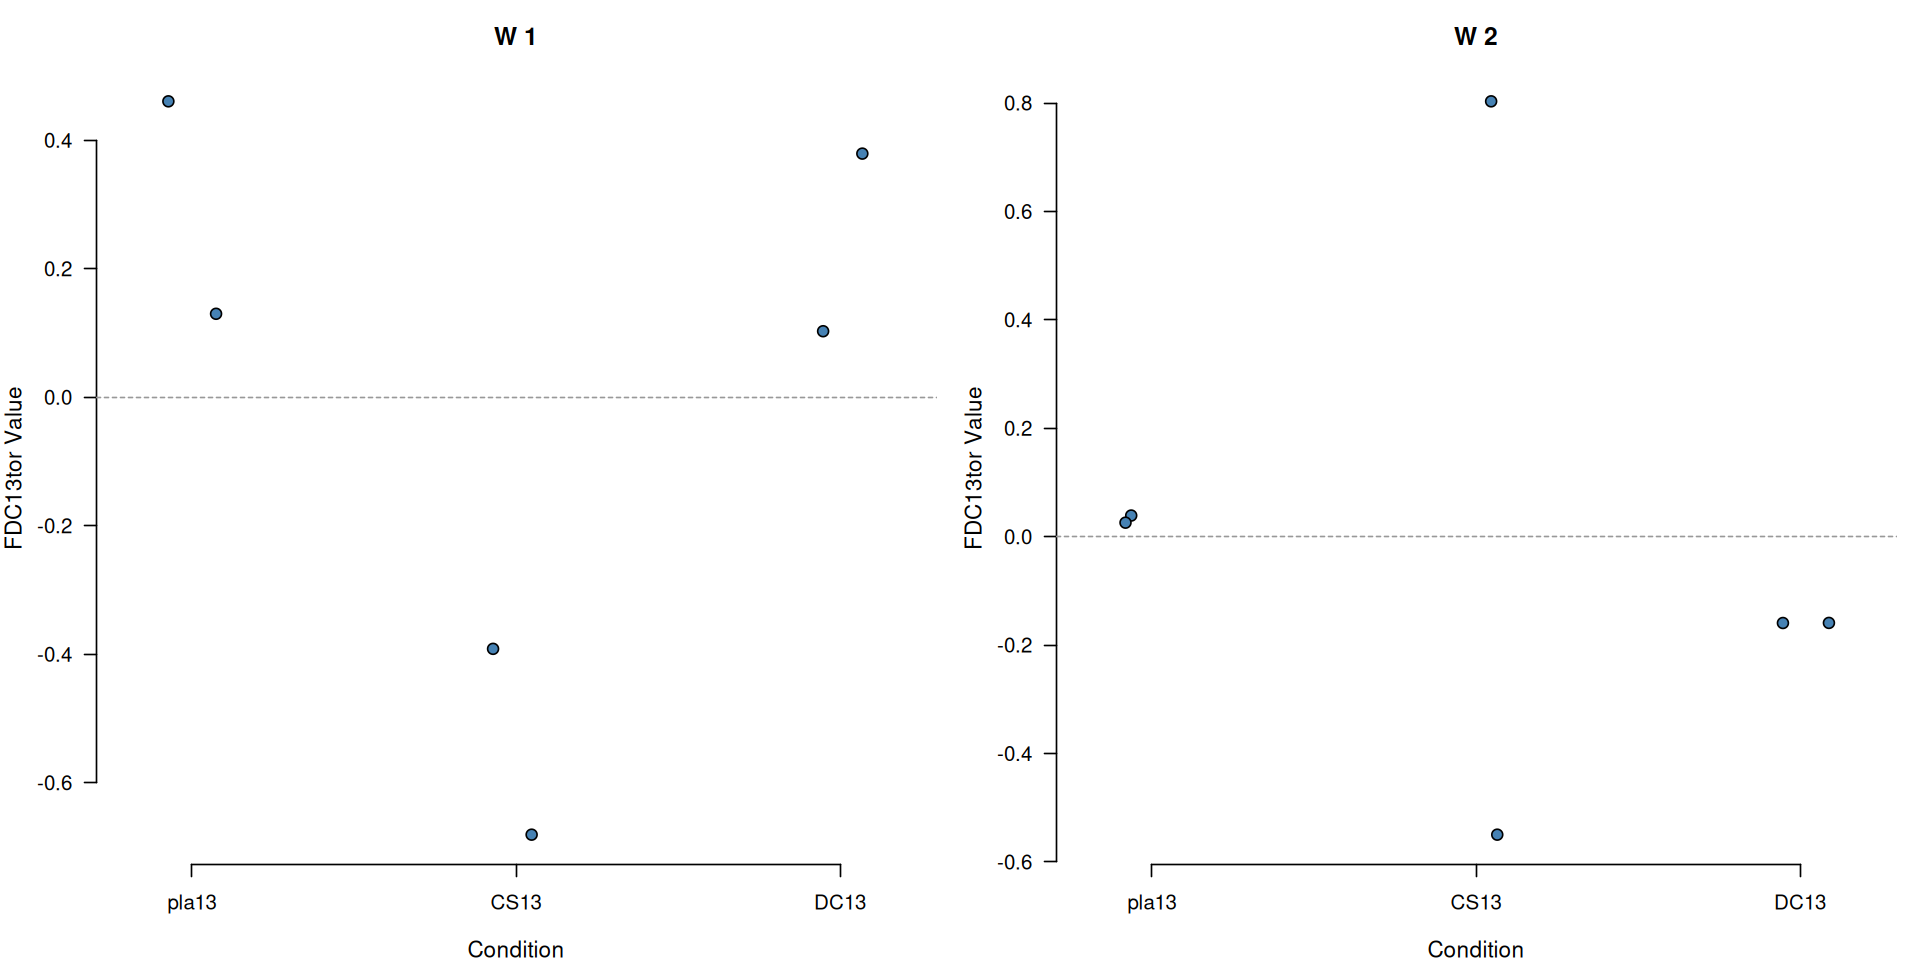

In [55]:
# Set layout to 1 row, 2 columns (side by side)
par(
  mfrow = c(1, 2),
  mar = c(4, 4, 3, 1),   # margins: bottom, left, top, right
  cex.main = 1.2,        # title size
  cex.axis = 1.0,        # axis tick label size
  cex.lab = 1.1,         # axis title size
  las = 1                # horizontal y-axis labels
)

# Loop over W1 and W2
for (i in 1:2) {
  stripchart(
    pData(set)[, i] ~ dds$condition,
    vertical = TRUE,
    method = "jitter",
    pch = 21,
    bg = "steelblue",
    col = "black",
    frame.plot = FALSE,
    main = paste("W", i),
    ylab = "FDC13tor Value",
    xlab = "Condition",
    cex = 1.1
  )
  abline(h = 0, lty = 2, col = "gray60", lwd = 1)
}


using ntop=500 top features by variance

using ntop=500 top features by variance



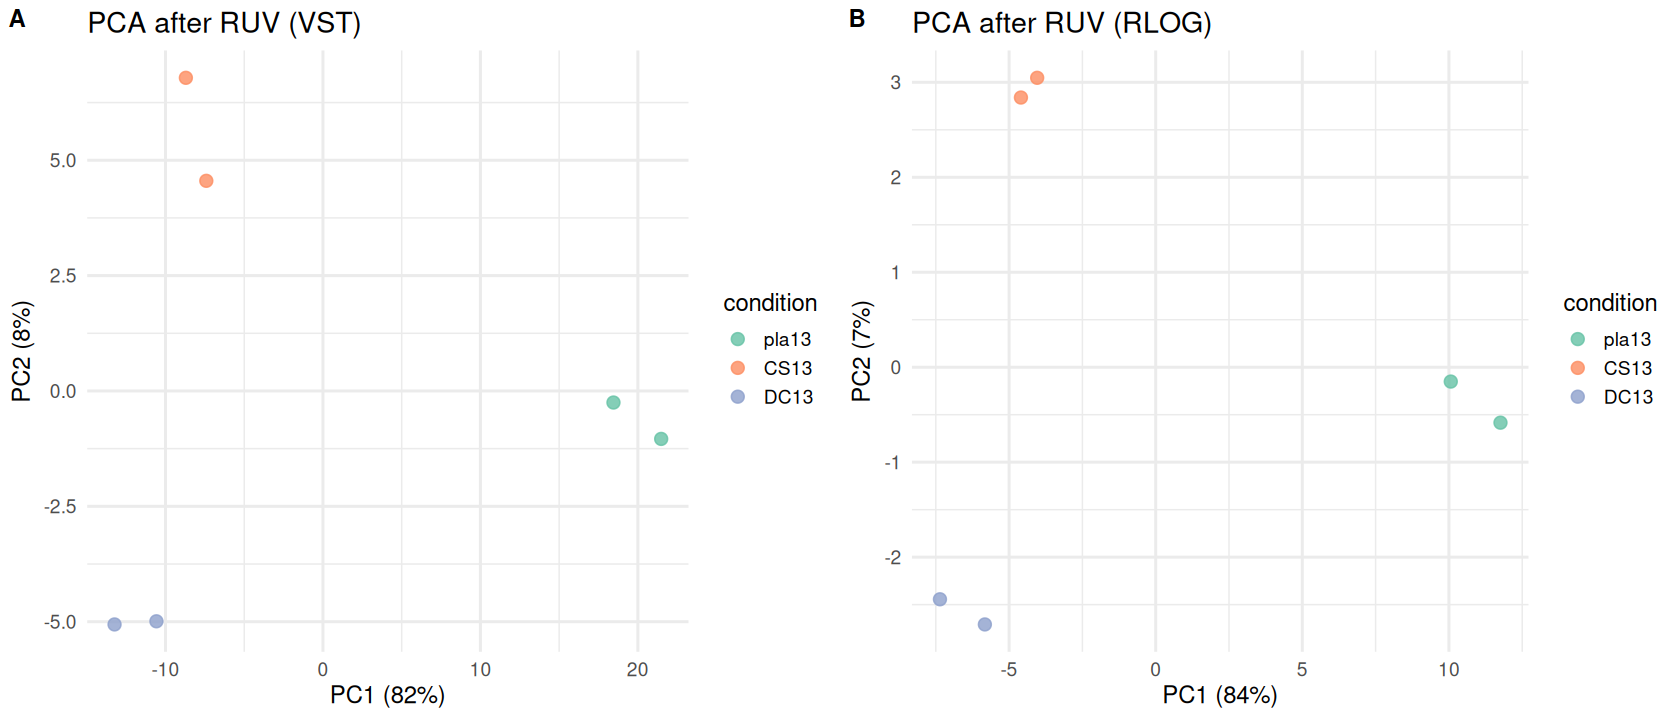

In [56]:
# Transform count data from ddsruv
vsd3 <- vst(ddsruv, blind = TRUE)
rld3 <- rlog(ddsruv, blind = TRUE)

# Get PCA data
pca_vsd <- plotPCA(vsd3, intgroup = "condition", returnData = TRUE)
pca_rld <- plotPCA(rld3, intgroup = "condition", returnData = TRUE)

# Variance explained
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

# PCA plot for VST
p1 <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after RUV (VST)",
    x = paste0("PC1 (", percentVar_vsd[1], "%)"),
    y = paste0("PC2 (", percentVar_vsd[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# PCA plot for RLOG
p2 <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after RUV (RLOG)",
    x = paste0("PC1 (", percentVar_rld[1], "%)"),
    y = paste0("PC2 (", percentVar_rld[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# Show both plots side by side with legends
options(repr.plot.width = 14, repr.plot.height = 6)
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2)

Warning message:
"ggrepel: 916 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


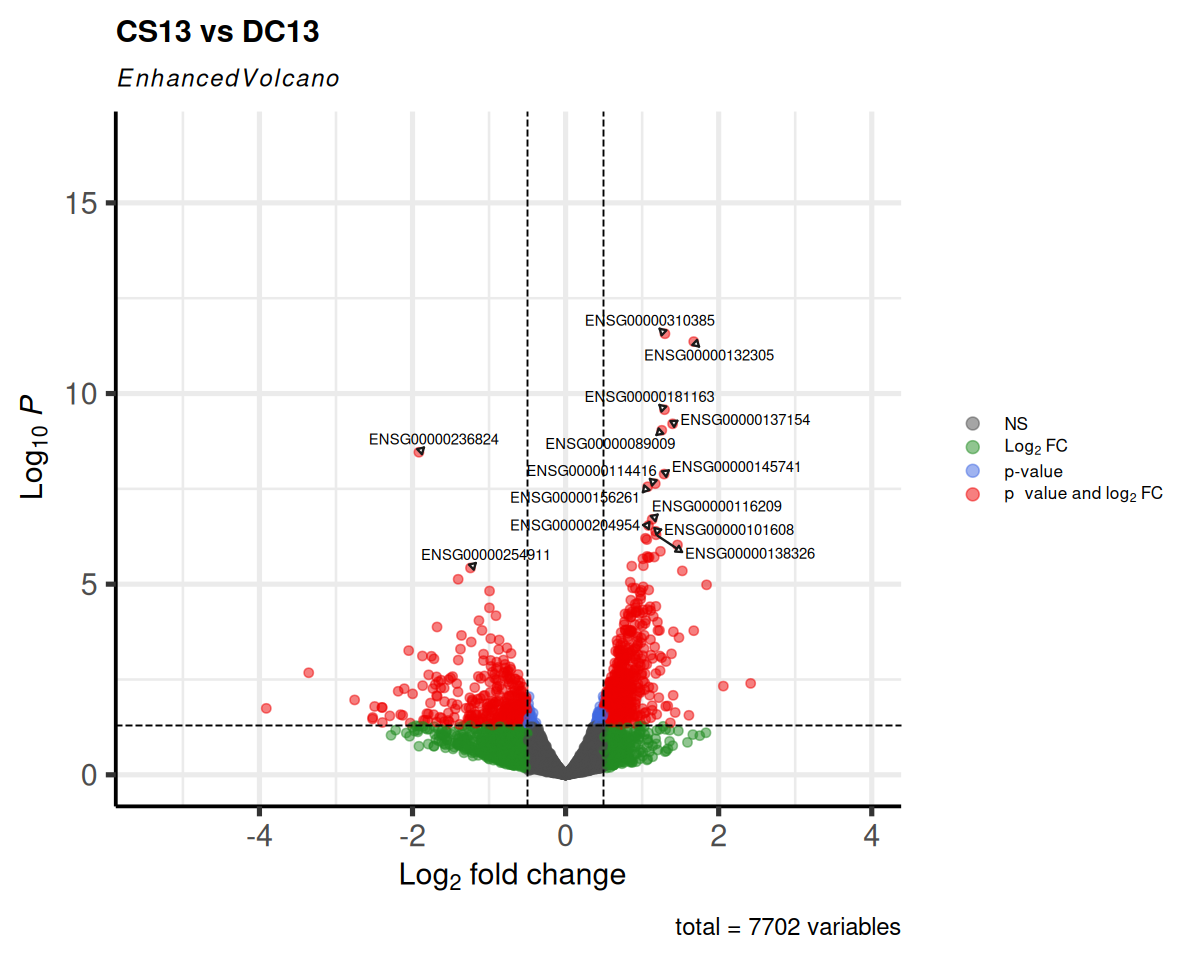

In [57]:
library(EnhancedVolcano)

# Color	Label in legend	Meaning
# Grey	NS	Not Significant – the gene did not pass the p-value or log₂FC thresholds
# Green	Log₂ FC	The gene passed the log₂ fold change cutoff but not the p-value cutoff
# Blue	p-value	The gene passed the p-value cutoff but not the log₂FC cutoff
# Red	p value and log₂ FC	The gene passed both p-value and log₂FC thresholds — most interesting hits

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

# Set up the plotting window size for a more compDC13t layout
options(repr.plot.width = 10, repr.plot.height = 8)

EnhancedVolcano(res_CS13_vs_DC13,
                lab = rownames(res_CS13_vs_DC13),
                x = 'log2FoldChange',
                y = 'pvalue',
                pCutoff = pval_cutoff,
                FCcutoff = lfc_cutoff,
                title = 'CS13 vs DC13',
                pointSize = 2.0,
                labSize = 3.0,
                legendPosition = 'right',
                legendLabSize = 10,
                legendIconSize = 3.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                boxedLabels = FALSE)


In [58]:
library(clusterProfiler)
library(org.Hs.eg.db) 
library(GO.db)         
library(DO.db)         
library(KEGGREST)      
library(ReactomePA)    
library(enrichplot)    
library(dplyr)
library(msigdbr)
library(msigdb)
library(msigdf)
library(msigdbdf)

clusterProfiler v4.14.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

G Yu. Thirteen years of clusterProfiler. The Innovation. 2024,
5(6):100722


Attaching package: 'clusterProfiler'


The following objects are masked from 'package:ensembldb':

    filter, select


The following object is masked from 'package:biomaRt':

    select


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:XVector':

    slice


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:IRanges':

    slice


The following object is masked from 'package:S4Vectors':

    rename


The following object is masked from 'package:stats':

    filter


ReactomePA v1.50.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
reactome pathway analysis and visualiza

In [59]:
# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5
fin_name = "A2780.peaks.IP.samples."

In [60]:
res <- res_CS13_vs_DC13  
head(res,3)

log2 fold change (MLE): condition CS13 vs DC13 
Wald test p-value: condition CS13 vs DC13 
DataFrame with 3 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000290825   24.8000     -0.7263712  0.523963 -1.386303  0.165654
ENSG00000310526  127.2788     -0.0717781  0.286016 -0.250958  0.801846
ENSG00000241860   10.6527      0.2840626  0.795866  0.356923  0.721150
                     padj
                <numeric>
ENSG00000290825        NA
ENSG00000310526  0.929027
ENSG00000241860        NA

In [61]:
# Filter significant genes
res_sig <- as.data.frame(res) %>%
  rownames_to_column("gene") %>%
  filter(padj < pval_cutoff & abs(log2FoldChange) > lfc_cutoff)

# MCS13 ENSEMBL IDs to Entrez IDs
gene_ids <- bitr(res_sig$gene, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)
res_merge <- merge(res_sig, gene_ids, by.x = "gene", by.y = "ENSEMBL")

# Prepare named gene list for GSEA
gene_list2 <- setNames(res_merge$log2FoldChange, res_merge$ENTREZID)
gene_list2 <- sort(gene_list2, decreasing = TRUE)

head(gene_list2, 2)
length(gene_list2)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(res_sig$gene, fromType = "ENSEMBL", toType = "ENTREZID", :
"7.65% of input gene IDs are fail to map..."


10989   493869 
1.674109 1.524676

[1] 172

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
no term enriched under specific pvalueCutoff...



No enriched terms in GSEA under pvalueCutoff.


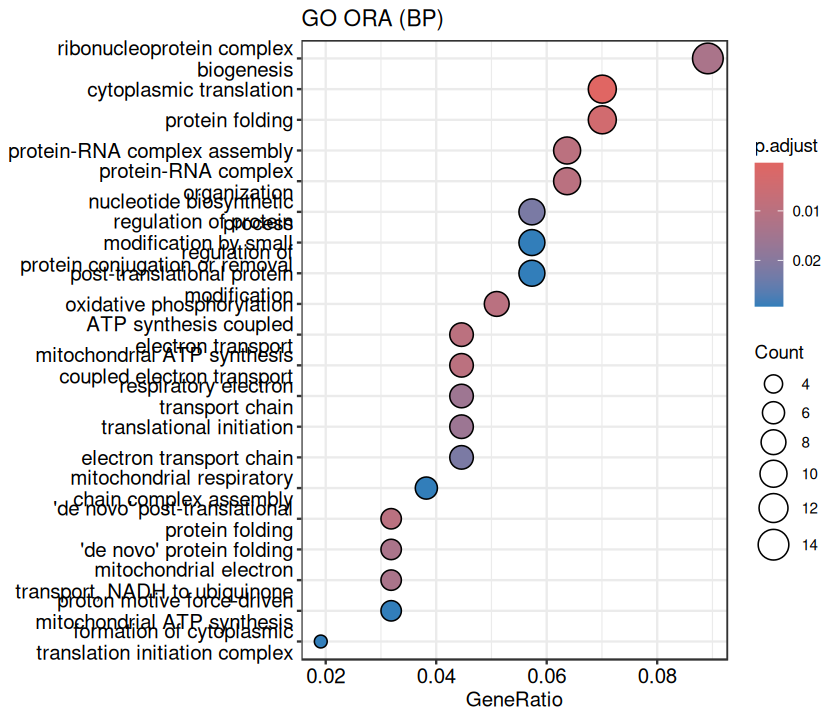

In [62]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(cowplot)

# Predefine result objects to pla13oid "not found" error
result <- NULL
result2 <- NULL

# GO Over-Representation Analysis (ORA)
result <- tryCatch({
  ego <- enrichGO(gene          = gene_ids$ENTREZID,
                  OrgDb         = org.Hs.eg.db,
                  ont           = "BP",
                  keyType       = "ENTREZID",  
                  pAdjustMethod = "BH",
                  pvalueCutoff  = 0.05,
                  qvalueCutoff  = 1,
                  readable      = TRUE)
  
  # Spla13e results
  write.table(ego@result, file = paste0(fin_name, "_GO_OverRepresentation_Results.txt"), 
              row.names = FALSE, col.names = TRUE, quote = FALSE)

  # Spla13e PNG
  png(paste0(fin_name, "_GO_OverRepresentation.png"), width = 1000, height = 800)
  print(dotplot(ego, showCategory = 20, title = "GO ORA (BP)"))
  dev.off()

  # Return ggplot object
  dotplot(ego, showCategory = 20, title = "GO ORA (BP)")

}, error = function(e) {
  cat("Error in GO ORA:", conditionMessage(e), "\n")
  NULL
})


# GO Enrichment Analysis (GSEA)
result2 <- tryCatch({
  ego2 <- gseGO(gene          = gene_list2,
                OrgDb         = org.Hs.eg.db,
                keyType       = "ENTREZID",  
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05)

  if (nrow(ego2@result) > 0) {
    write.table(ego2@result, file = paste0(fin_name, "_GO_Enrichment_Results.txt"), 
                row.names = FALSE, col.names = TRUE, quote = FALSE)

    png(paste0(fin_name, "_GO_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(ego2, showCategory = 20, title = "GO GSEA (BP)"))
    dev.off()

    dotplot(ego2, showCategory = 20, title = "GO GSEA (BP)")
  } else {
    cat("No enriched terms in GSEA under pvalueCutoff.\n")
    NULL
  }

}, error = function(e) {
  cat("Error in GO GSEA:", conditionMessage(e), "\n")
  NULL
})

# === Display plots side by side if both exist ===
options(repr.plot.width = 6, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))
} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)
} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)
} else {
  cat("No enrichment plots to display.\n")
}


Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
no term enriched under specific pvalueCutoff...



⚠️ No enriched KEGG terms found in GSEA.


NULL

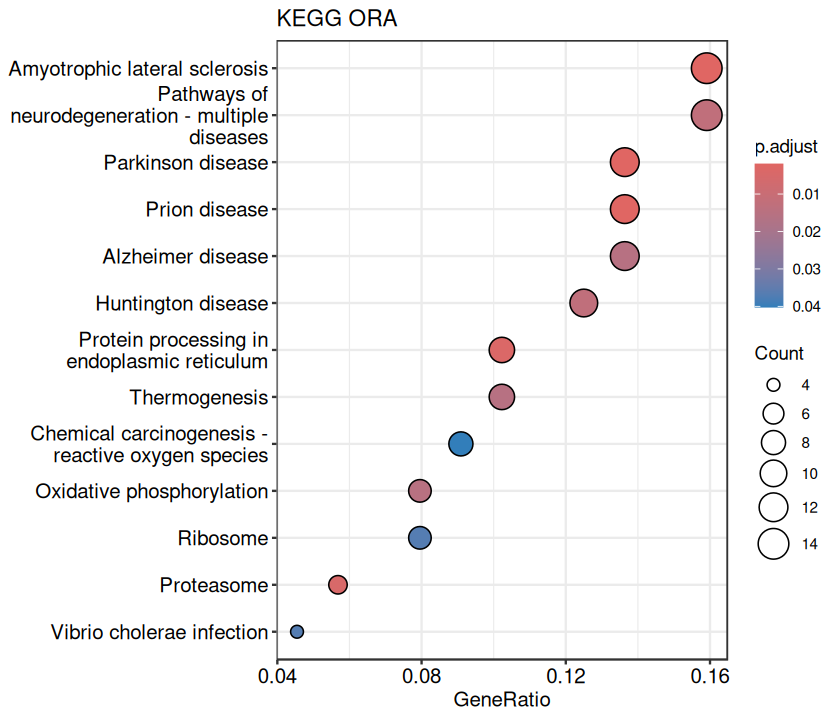

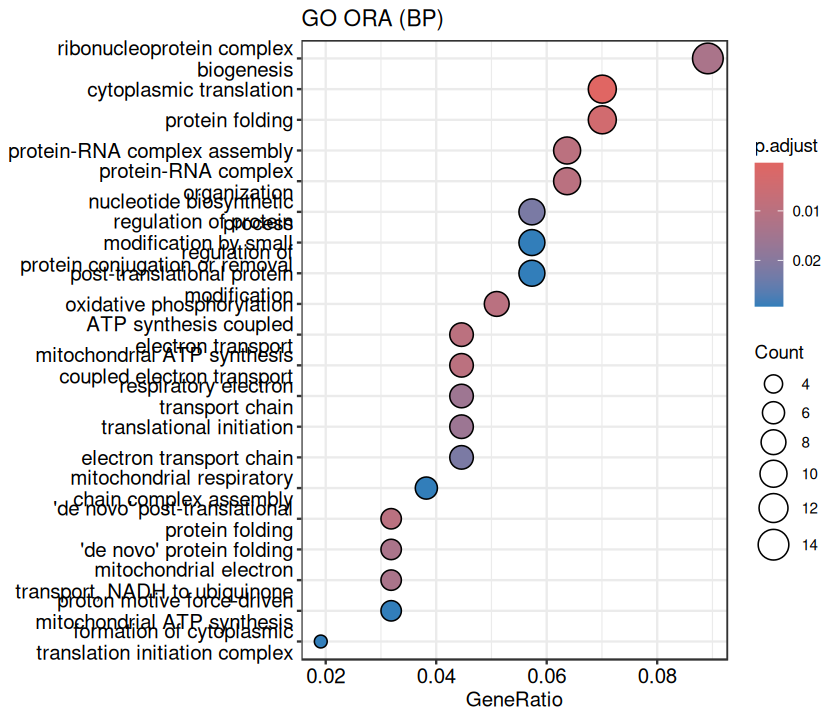

In [63]:
# === KEGG Over-Representation Analysis (ORA) ===
result <- tryCatch({

  kegg_enrich <- enrichKEGG(
    gene           = gene_ids$ENTREZID,
    organism       = "hsa",
    pAdjustMethod  = "BH",
    pvalueCutoff   = 0.05
  )

  if (!is.null(kegg_enrich) && nrow(kegg_enrich@result) > 0) {

    # Spla13e results
    write.table(kegg_enrich@result,
                file = paste0(fin_name, "_KEGG_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Spla13e PNG plot
    png(paste0(fin_name, "_KEGG_OverRepresentation_Plot.png"), width = 1000, height = 800)
    print(dotplot(kegg_enrich, showCategory = 20, title = "KEGG ORA"))
    dev.off()

    # Return plot object
    return(dotplot(kegg_enrich, showCategory = 20, title = "KEGG ORA"))

  } else {
    cat("⚠️ No enriched KEGG terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in KEGG ORA:", conditionMessage(e), "\n")
  return(NULL)
})



# === KEGG Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  kegg_gse <- gseKEGG(
    geneList      = gene_list2,
    organism      = "hsa",
    minGSSize     = 120,
    pvalueCutoff  = 0.05,
    verbose       = FALSE
  )

  if (!is.null(kegg_gse) && nrow(kegg_gse@result) > 0) {

    # Spla13e results
    write.table(kegg_gse@result,
                file = paste0(fin_name, "_KEGG_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Spla13e PNG plot
    png(paste0(fin_name, "_KEGG_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(kegg_gse, showCategory = 20, title = "KEGG GSEA"))
    dev.off()

    # Return plot object
    return(dotplot(kegg_gse, showCategory = 20, title = "KEGG GSEA"))

  } else {
    cat("⚠️ No enriched KEGG terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in KEGG GSEA:", conditionMessage(e), "\n")
  return(NULL)
})



# === Display Plots Nicely ===
# Set default figure size
options(repr.plot.width = 6, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  # Side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No KEGG enrichment plots to display.\n")
}


In [64]:
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(pathview)         # Optional for WikiPathways
library(dplyr)
library(DOSE)
library(rWikiPathways)

# === WikiPathways Over-Representation Analysis (ORA) ===
result <- tryCatch({

  wikipathways_enrich <- enrichWP(
    gene           = gene_ids$ENTREZID,
    organism       = "Homo sapiens",
    pvalueCutoff   = 0.05
  )

  if (!is.null(wikipathways_enrich) && nrow(wikipathways_enrich@result) > 0) {

    # Spla13e results
    write.table(wikipathways_enrich@result,
                file = paste0(fin_name, "_WikiPathways_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Spla13e plot
    png(paste0(fin_name, "_WikiPathways_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_enrich, showCategory = 20, title = "WikiPathways ORA"))
    dev.off()

    # Return plot object
    return(dotplot(wikipathways_enrich, showCategory = 20, title = "WikiPathways ORA"))

  } else {
    cat("⚠️ No enriched WikiPathways terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in WikiPathways ORA:", conditionMessage(e), "\n")
  return(NULL)
})



# === WikiPathways Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  wikipathways_gse <- gseWP(
    gene          = gene_list2,
    organism      = "Homo sapiens",
    pvalueCutoff  = 0.05
  )

  if (!is.null(wikipathways_gse) && nrow(wikipathways_gse@result) > 0) {

    # Spla13e results
    write.table(wikipathways_gse@result,
                file = paste0(fin_name, "_WikiPathways_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Spla13e plot
    png(paste0(fin_name, "_WikiPathways_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_gse, showCategory = 20, title = "WikiPathways GSEA"))
    dev.off()

    # Return plot object
    return(dotplot(wikipathways_gse, showCategory = 20, title = "WikiPathways GSEA"))

  } else {
    cat("⚠️ No enriched WikiPathways terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in WikiPathways GSEA:", conditionMessage(e), "\n")
  return(NULL)
})



# === Display plots ===
options(repr.plot.width = 5, repr.plot.height = 5)  # Default size

if (!is.null(result) && !is.null(result2)) {
  # Show both plots side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No WikiPathways enrichment plots to display.\n")
}


##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################

DOSE v4.0.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an
R/Bioconductor package for Disease Ontology Semantic and Enrichment
analysis. Bioinformatics. 2015, 31(4):608-609


Attaching package: 'rWikiPathways'


The following object 

❌ Error in WikiPathways ORA: replacement has length zero 


using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
no term enriched under specific pvalueCutoff...



⚠️ No enriched WikiPathways terms found in GSEA.


NULL

⚠️ No WikiPathways enrichment plots to display.


using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
no term enriched under specific pvalueCutoff...



⚠️ No enriched Reactome terms found in GSEA.


NULL

⚠️ No ReDC13tome enrichment plots to display.


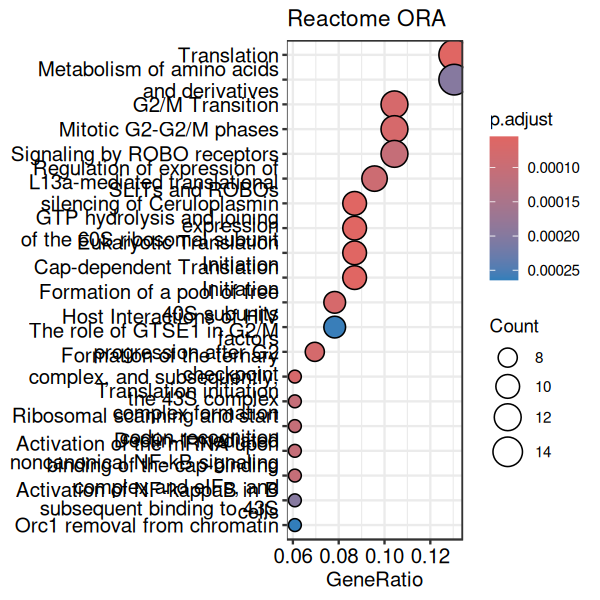

In [65]:
library(ReactomePA)
library(clusterProfiler)
library(enrichplot)
library(cowplot)

# === Reactome Over-Representation Analysis (ORA) ===
result <- tryCatch({

  reactome_ora <- enrichPathway(
    gene           = gene_ids$ENTREZID,
    organism       = "human",
    pAdjustMethod  = "BH",
    pvalueCutoff   = 0.05
  )

  if (!is.null(reactome_ora) && nrow(reactome_ora@result) > 0) {

    # Spla13e results
    write.table(reactome_ora@result,
                file = paste0(fin_name, "_Reactome_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Spla13e plot
    png(paste0(fin_name, "_Reactome_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_ora, showCategory = 20, title = "Reactome ORA"))
    dev.off()

    # Return plot for screen
    return(dotplot(reactome_ora, showCategory = 20, title = "Reactome ORA"))

  } else {
    cat("⚠️ No enriched Reactome terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in Reactome ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Reactome GSEA Analysis ===
result2 <- tryCatch({

  reactome_gsea <- gsePathway(
    gene            = gene_list2,
    organism        = "human",
    pAdjustMethod   = "BH",
    pvalueCutoff    = 0.05
  )

  if (!is.null(reactome_gsea) && nrow(reactome_gsea@result) > 0) {

    # Spla13e results
    write.table(reactome_gsea@result,
                file = paste0(fin_name, "_Reactome_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Spla13e plot
    png(paste0(fin_name, "_Reactome_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_gsea, showCategory = 20, title = "Reactome GSEA"))
    dev.off()

    # Return plot for screen
    return(dotplot(reactome_gsea, showCategory = 20, title = "Reactome GSEA"))

  } else {
    cat("⚠️ No enriched Reactome terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in Reactome GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 6, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  # Show both side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No ReDC13tome enrichment plots to display.\n")
}


Warning message:
"The `category` argument of `msigdbr()` is deprecated as of msigdbr 9.0.0.
ℹ Please use the `collection` argument instead."
using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
no term enriched under specific pvalueCutoff...



⚠️ No significant MSigDB GSEA pathways found.


NULL

⚠️ No MSigDB enrichment plots to display.


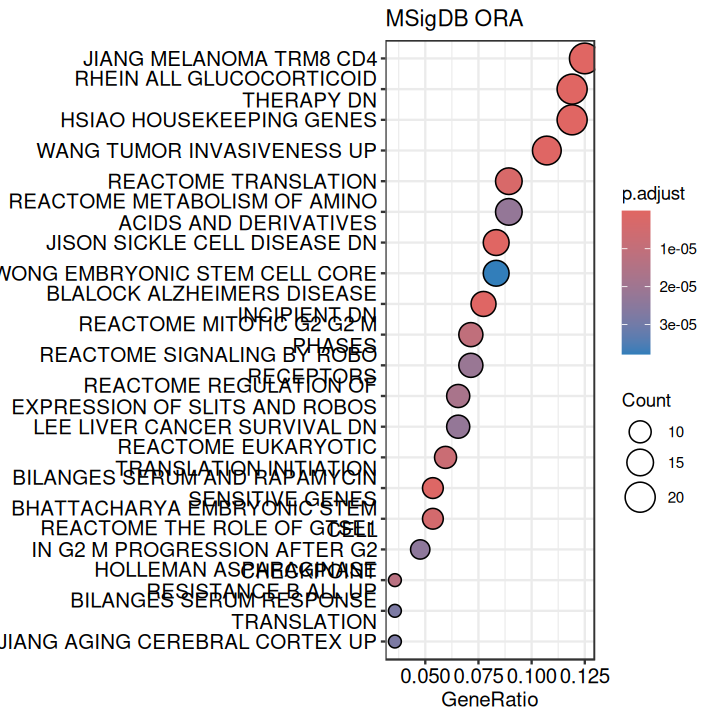

In [66]:
library(msigdbr)
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(dplyr)

# === Prepare MSigDB C2 gene sets ===
msig_genesets <- msigdbr(species = "Homo sapiens", category = "C2")
C2_t2g <- msig_genesets %>% dplyr::select(gs_name, entrez_gene)

# Use gene_ids$ENTREZID for ORA, and named gene_list2 for GSEA
gene_list <- gene_ids$ENTREZID  # for ORA

# === MSigDB Over-Representation Analysis (ORA) ===
result <- tryCatch({

  msig_enrich <- enricher(
    gene       = gene_list,
    TERM2GENE  = C2_t2g
  )

  if (!is.null(msig_enrich) && nrow(msig_enrich@result) > 0) {

    write.table(msig_enrich@result,
                file = paste0(fin_name, "_MSigDB_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))
    dev.off()

    return(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))

  } else {
    cat("⚠️ No significant MSigDB pathways found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === MSigDB Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  msig_gsea <- GSEA(
    geneList   = gene_list2,
    TERM2GENE  = C2_t2g,
    pvalueCutoff = 0.05
  )

  if (!is.null(msig_gsea) && nrow(msig_gsea@result) > 0) {

    write.table(msig_gsea@result,
                file = paste0(fin_name, "_MSigDB_GSEA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_GSEA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))
    dev.off()

    return(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))

  } else {
    cat("⚠️ No significant MSigDB GSEA pathways found.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 20, repr.plot.height = 20)

if (!is.null(result) && !is.null(result2)) {
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No MSigDB enrichment plots to display.\n")
}


using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
no term enriched under specific pvalueCutoff...



⚠️ No significant MSigDB GSEA pathways found.


NULL

⚠️ No MSigDB enrichment plots to display.


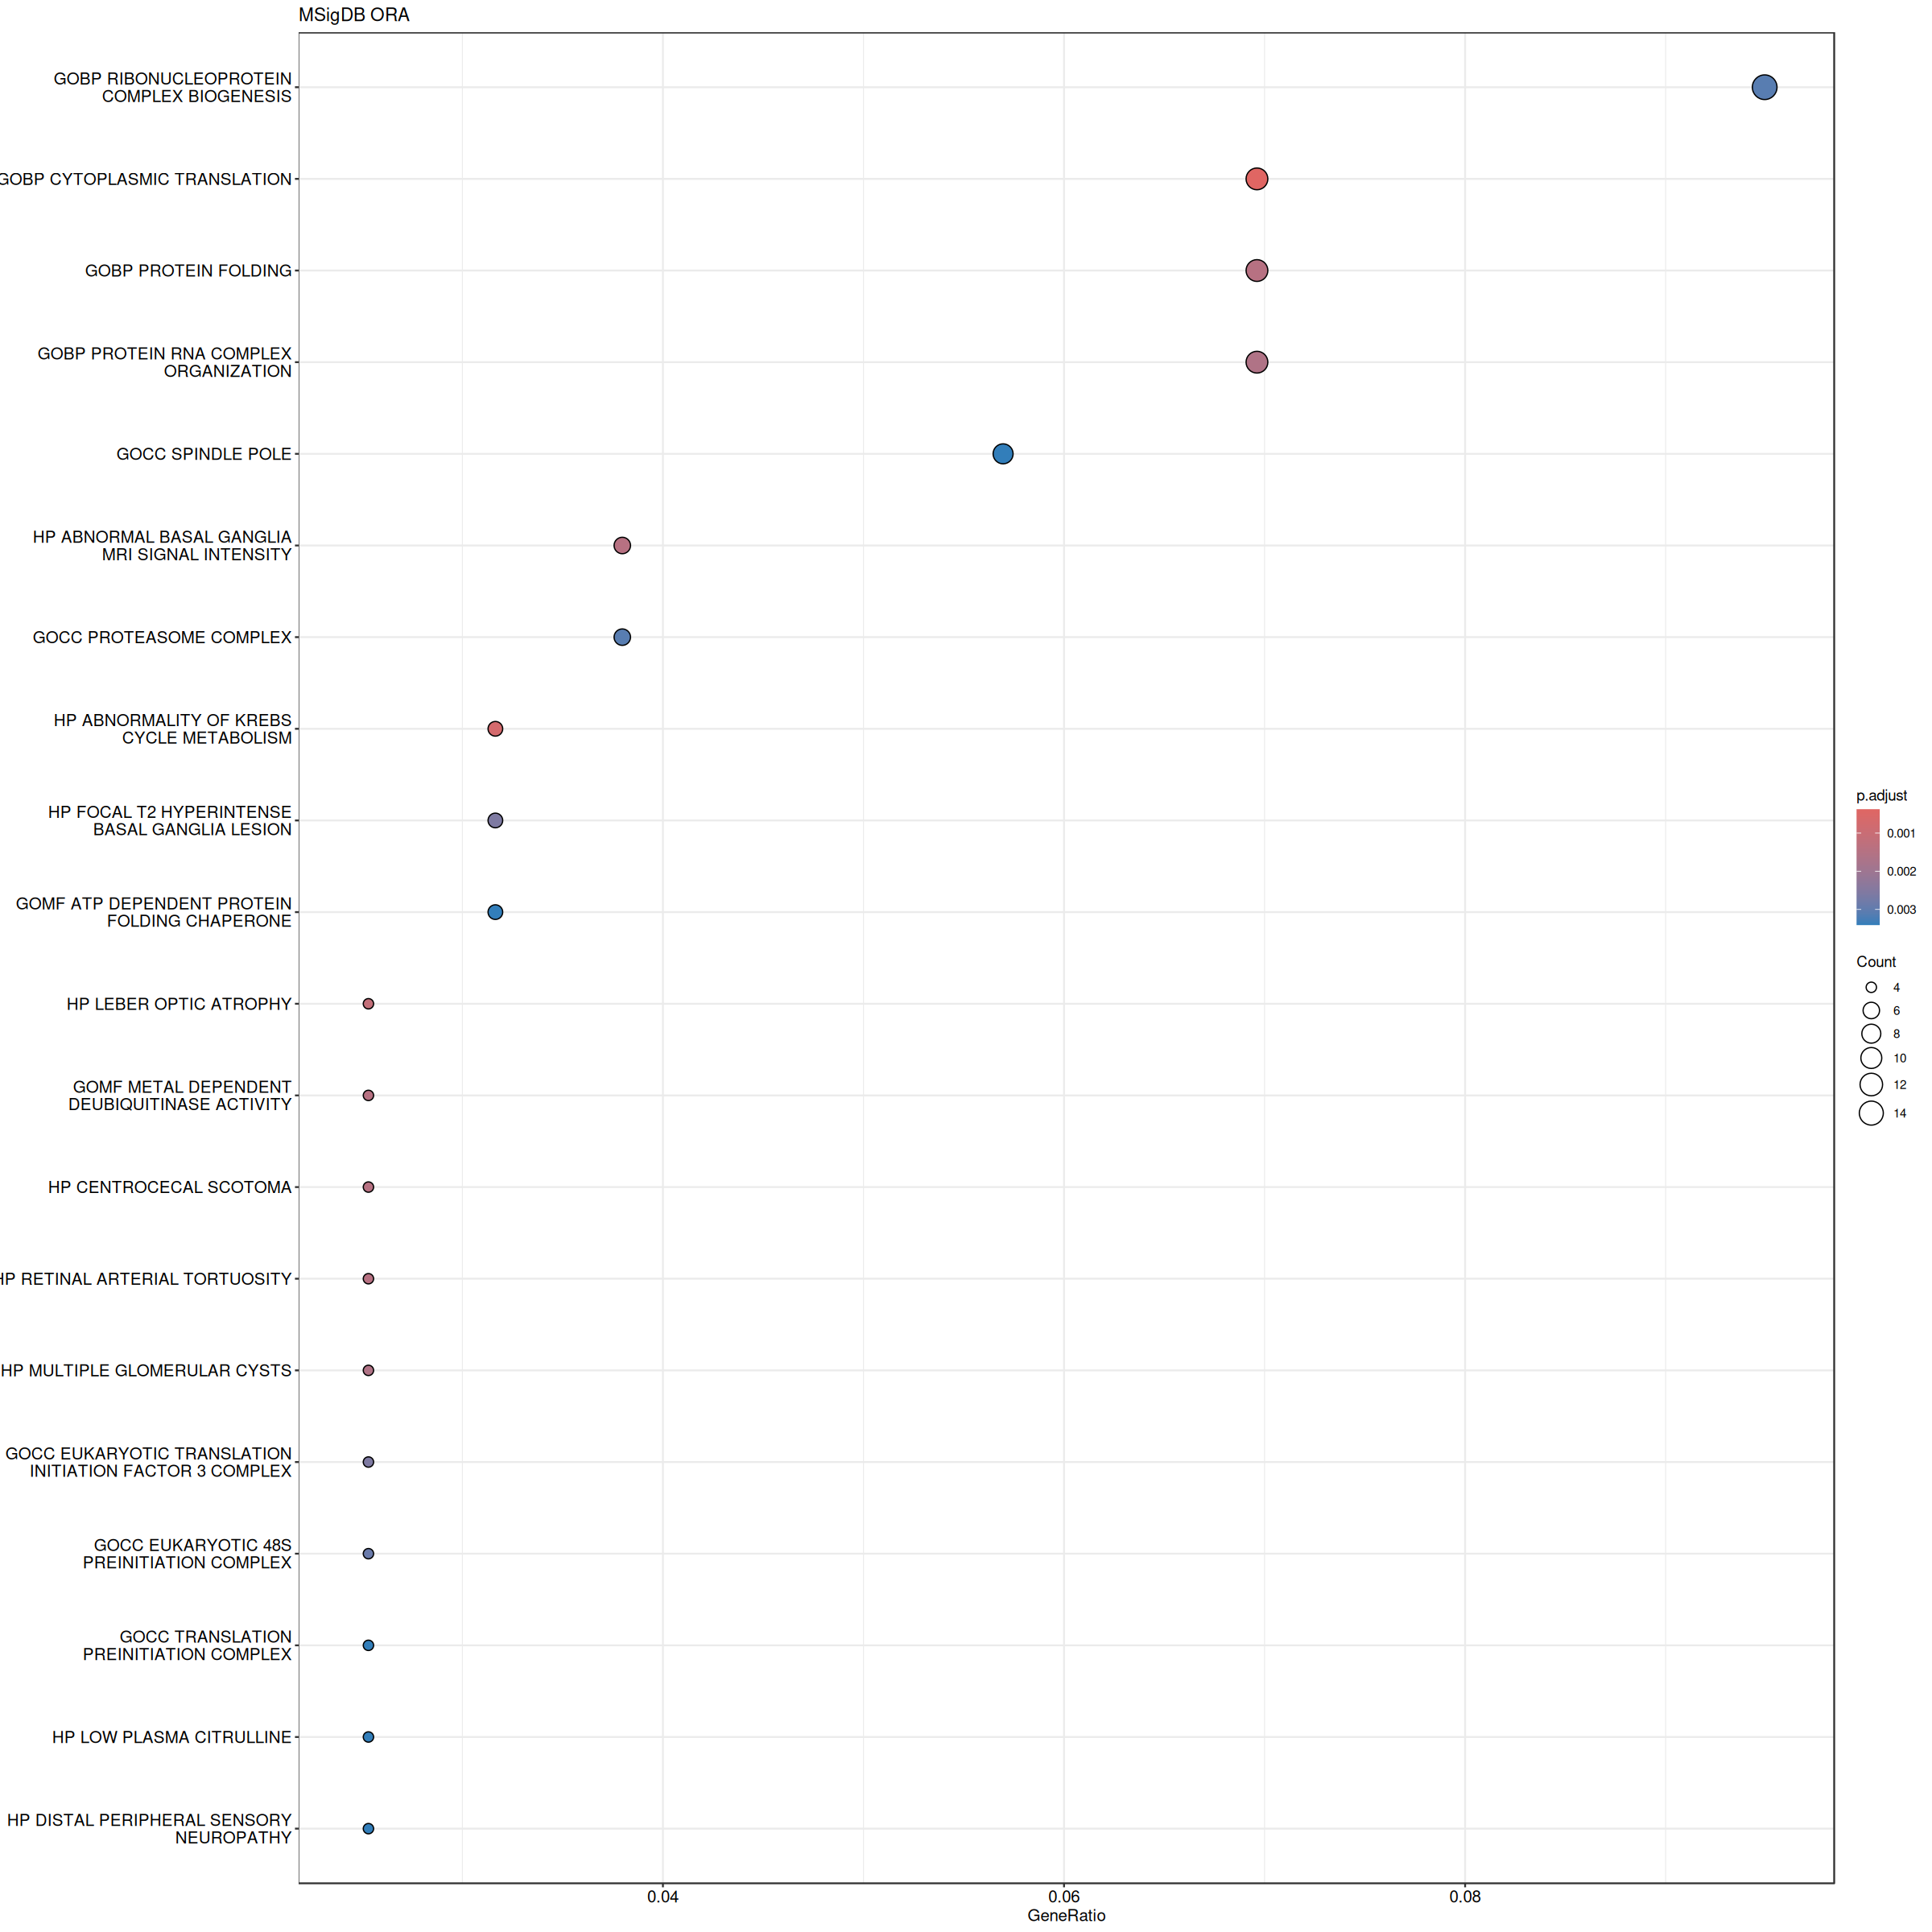

In [67]:
library(msigdbr)
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(dplyr)

# === Prepare MSigDB C2 gene sets ===
msig_genesets <- msigdbr(species = "Homo sapiens", category = "C5")
C2_t2g <- msig_genesets %>% dplyr::select(gs_name, entrez_gene)

# Use gene_ids$ENTREZID for ORA, and named gene_list2 for GSEA
gene_list <- gene_ids$ENTREZID  # for ORA

# === MSigDB Over-Representation Analysis (ORA) ===
result <- tryCatch({

  msig_enrich <- enricher(
    gene       = gene_list,
    TERM2GENE  = C2_t2g
  )

  if (!is.null(msig_enrich) && nrow(msig_enrich@result) > 0) {

    write.table(msig_enrich@result,
                file = paste0(fin_name, "_MSigDB_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))
    dev.off()

    return(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))

  } else {
    cat("⚠️ No significant MSigDB pathways found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === MSigDB Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  msig_gsea <- GSEA(
    geneList   = gene_list2,
    TERM2GENE  = C2_t2g,
    pvalueCutoff = 0.05
  )

  if (!is.null(msig_gsea) && nrow(msig_gsea@result) > 0) {

    write.table(msig_gsea@result,
                file = paste0(fin_name, "_MSigDB_GSEA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_GSEA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))
    dev.off()

    return(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))

  } else {
    cat("⚠️ No significant MSigDB GSEA pathways found.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 10, repr.plot.height = 10)

if (!is.null(result) && !is.null(result2)) {
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No MSigDB enrichment plots to display.\n")
}
